# Milestone 1
* This is a preliminary milestone to let you set up goals for your final project and assess the feasibility of your ideas. Please, fill the following sections about your project. (max. 2000 characters per section)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(color_codes=True)

In [ ]:
''' Comment this if not using Google Colab '''
from google.colab import drive
drive.mount('/content/drive')

## Dataset


* Find a dataset (or multiple) that you will explore. Assess the quality of the data it contains and how much preprocessing / data-cleaning it will require before tackling visualization. We recommend using a standard dataset as this course is not about scraping nor data processing.

## Problematic

The aim of this project is to visulize pokemon's dynamics across generations for the user to better make up his own pokemon. This project also means at providing insights on the intricate links between the different pokemon features in order to gauge their  importance and impact on the pokemon overall statistics and behaviour in combat. Finally, this project will display a visulization of the choice that were made  regarding the important features throughout the generations to better understand how this game evolved with his users. 

* __Figure 1__ : Graphical representation of pokemon statistics across generations:
   
  * By default, displayed features would be the ones juged as signficantly different across generations
  * Dynamical graphic where user could also specify the feature he is interested in 
  * Visualise feature distribution
  * Ability to evolve through generations
  * Provides insights on the designers choices over the generations 
* __Figure 2__ : Circular representation of feature importance and diversity in context of combat :
  * Dynamical representation of all pokemons in a circular manner. 
  * Directed graph with edges going from winner to loser 
  * Ability to select specific generation 
  * Ability to rearrange winners and losers with respect to features such as their types, if they are legendary and others to be defined
  * Ability to hover over the pokemons to see display pokemon card containing both bried textual description and spider chart of his main features 

* __Figure 3__ : Features relationships : 
   * Aims at showing how chosing a specfic value for a feature will impact on another statistic. 
   * Dynamical bipartite graphic 
   * By default, displayed features would be the ones juged having significant relationship across generations
   * User could chose the two features he is interested in 
   * Dynamical vue over the generations 
* __Figure 4__: Pokemon cooking :
   * Based on previous information, recommender system will be built to help user better chose feaures and values 
   * Linking esthtic feature with their outcome on other statistics 
   * Outputs the optimal pokemon choice based on a given subset of features 

## Exploratory Data Analysis

* Pre-processing of the data set you chose:

  * Show some basic statistics and get insights about the data
* To better dispatch the workload, variables were grouped in three different sets and  dispatched among the team members 

In [4]:
# TODO: Label all axes & give title to each graph

In [ ]:
# Import data for Google Colab
# TODO: We can remove stats and abilities datasets if we won't use them for sure
df_stats = pd.read_csv('drive/My Drive/pokemon/dataset_stats.csv') 
df_abilities = pd.read_csv('drive/My Drive/pokemon/dataset_abilities.csv')
df = pd.read_csv('drive/My Drive/pokemon/first6gens.csv') # merged dataset

In [3]:
# Import data for Jupyter Lab
df = pd.read_csv('data/first6gens.csv')
df_abilities = pd.read_csv('data/dataset_abilities.csv')

In [4]:
df.shape

(721, 44)

In [5]:
df.columns

Index(['pokedex_number', 'name', 'type1', 'type2', 'hp', 'defense', 'attack',
       'sp_defense', 'sp_attack', 'speed', 'base_total', 'capture_rate',
       'base_happiness', 'experience_growth', 'height_m', 'weight_kg',
       'percentage_male', 'is_legendary', 'generation', 'classfication',
       'Color', 'Body_Style', 'hasMegaEvolution', 'Egg_Group_1', 'Egg_Group_2',
       'base_egg_steps', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water'],
      dtype='object')

There are 721 pokemon with 44 features in our dataset, which includes the first 6 generations of Pokemon.

In [6]:
# Plots groupby_var-wise LINE histogram of a given 'var' wrt a given 'groupby_var' 
# e.g. var: 'attack', groupby_var: 'generation; --> attack distribution over generations
def plot_grouped_line_hist(df, var, groupby_var):
    df_var = df.groupby([groupby_var,var])['name'].count()\
                              .to_frame().reset_index()
                                                 
    df_var = df_var.rename(columns={"name":"count"})
    plt.figure(figsize=(13,7))
    ax = sns.lineplot(x=var, y="count",hue=groupby_var,palette=sns.color_palette("husl", 6),
                    data=df_hp)
    ttl=plt.title(str(var) + ' distribution over ' + str(groupby_var))

In [7]:
# Plots groupby_var-wise BOX histogram of a given 'var' wrt a given 'groupby_var' 
# e.g. var: 'attack', groupby_var: 'generation; --> attack distribution over generations
def plot_grouped_box_hist(df, var, groupby_var):
    fig,ax = plt.subplots(figsize=(13,7))
    hatches = ('','','','','',',')         # fill pattern
    for (i, d),hatch in zip(df.groupby(groupby_var), hatches):
        fig=d[var].hist(alpha=0.7,bins=7, ax=ax, label= str(groupby_var) + ' ' + str(i), hatch=hatch)
        lg =ax.legend()
        ttl=plt.title(str(var) + ' distribution over ' + str(groupby_var))

### Feature-group 1
1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS

	•	percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
	•	type1: The Primary Type of the Pokemon
	•	type2: The Secondary Type of the Pokemon
	•	classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
	•	height_m: Height of the Pokemon in metres
	•	weight_kg: The Weight of the Pokemon in kilograms
	•	capture_rate: Capture Rate of the Pokemon
	•	abilities: A stringified list of abilities that the Pokemon is capable of having
	•	experience_growth: The Experience Growth of the Pokemon

#### Preprocessing group 1 / preliminary informations

In [8]:
selected_ = ['pokedex_number','name','type1', 'type2','classfication',\
            'height_m', 'weight_kg','capture_rate',
            'experience_growth','generation']
df = df[selected_]
df_abilities = df_abilities[['pokedex_number','name','abilities','generation']]
df_abilities = df_abilities[df_abilities.generation < 7]# keeping first 6 generations 
df = df.rename(columns={'classfication':'classification'})



In [9]:
df_groupe1 = pd.merge(df, df_abilities, how='left', on=['pokedex_number','name','generation'])

In [10]:
df_groupe1.head()

,pokedex_number,name,type1,type2,classification,height_m,weight_kg,capture_rate,experience_growth,generation,abilities
0,1,Bulbasaur,grass,poison,Seed Pokémon,0.7,6.9,45,1059860,1,"['Overgrow', 'Chlorophyll']"
1,2,Ivysaur,grass,poison,Seed Pokémon,1.0,13.0,45,1059860,1,"['Overgrow', 'Chlorophyll']"
2,3,Venusaur,grass,poison,Seed Pokémon,2.0,100.0,45,1059860,1,"['Overgrow', 'Chlorophyll']"
3,4,Charmander,fire,NaN,Lizard Pokémon,0.6,8.5,45,1059860,1,"['Blaze', 'Solar Power']"
4,5,Charmeleon,fire,NaN,Flame Pokémon,1.1,19.0,45,1059860,1,"['Blaze', 'Solar Power']"


In [15]:
print("total null values: ", df_groupe1.isna().sum().sum())

total null values:  393


In [16]:
df_groupe1.loc[:, df_groupe1.isna().any()]

,type2,height_m,weight_kg
0,poison,0.7,6.9
1,poison,1.0,13.0
2,poison,2.0,100.0
3,NaN,0.6,8.5
4,NaN,1.1,19.0
...,...,...,...
716,flying,5.8,203.0
717,ground,5.0,284.6
718,fairy,0.7,8.8
719,ghost,NaN,NaN


In [17]:
df_groupe1[df_groupe1.height_m.isna()].shape

(19, 11)

In [12]:
missing = df_groupe1[df_groupe1.height_m.isna()].shape
print(" Number of pokemons both missing height and weight : ",missing[0] )

 Number of pokemons both missing height and weight :  19


In [19]:
df_groupe1[df_groupe1.type2.isna()].shape

(355, 11)

In [20]:
print("pokemons with one type : ",355 )

pokemons with one type :  355


In [21]:
df_groupe1['height_m'] = df_groupe1['height_m'].fillna(0)
df_groupe1['weight_kg'] = df_groupe1['weight_kg'].fillna(0)

In [22]:
pd.concat([df_groupe1.min().rename('min'), df_groupe1.max().rename('max')], axis=1)

,min,max
pokedex_number,1,721
name,Abomasnow,Zygarde
type1,bug,water
classfication,Abundance Pokémon,Zen Charm Pokémon
height_m,0,14.5
weight_kg,0,950
capture_rate,3,255
experience_growth,600000,1640000
generation,1,6
abilities,"['Adaptability', 'Download', 'Analytic']","['Wonder Skin ', 'Magic Guard', 'Tinted Lens']"


In [30]:
#stripping strings out of list of string
df_groupe1.abilities=df_groupe1.abilities.apply(lambda x: x.strip("[]").replace('\'','')\
                                        .split(", "))

In [14]:
# Replacing Nan values with value of 0 to ease up further processings 
df_groupe1['height_m'] = df_groupe1['height_m'].fillna(0)
df_groupe1['weight_kg'] = df_groupe1['weight_kg'].fillna(0)

In [15]:
# Summmary of range of values taken by each of group 1 variables
pd.concat([df_groupe1.min().rename('min'), df_groupe1.max().rename('max')], axis=1)

,min,max
pokedex_number,1,721
name,Abomasnow,Zygarde
type1,bug,water
classification,Abundance Pokémon,Zen Charm Pokémon
height_m,0,14.5
weight_kg,0,950
capture_rate,3,255
experience_growth,600000,1640000
generation,1,6
abilities,"['Adaptability', 'Download', 'Analytic']","['Wonder Skin ', 'Magic Guard', 'Tinted Lens']"


## Distribution plot group 1 

#### Group1 continuous variables 



__Figure 1__ 

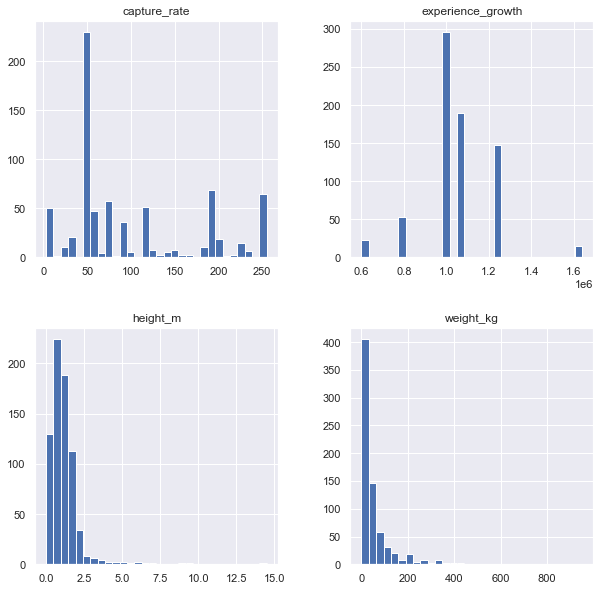

In [18]:
#distribution of continuous variables for all generations toguether 
fig = df_groupe1[['height_m','weight_kg','capture_rate','experience_growth']]\
.hist(figsize=(10,10), bins= 30)

As preliminary observation one can mention the skewness of both height and weight variables. Most pokemons have small values for those two varibales. One can also mention the fact that both capture rate and experience_growth are categorical variables

In [21]:
# Row plot of Height distribution per generation. 
def hist_gen_plot(data_set,variable_y,variable_row):
    #p=plt.subplots_adjust(top=0.3)
    #ttl=plt.title(str(variable_y) + ' distribution over ' + str(variable_row))
    ordered_days = data_set[variable_row].value_counts().sort_index(ascending=False).index
    g = sns.FacetGrid(data_set, row=variable_row, row_order=ordered_days,
                      height=1.7, aspect=4)
    g.map(sns.distplot, variable_y, hist=True, rug=False);
    ttl=g.fig.suptitle(str(variable_y).upper() + ' distribution over ' + str(variable_row).upper(),y=1.05)




__Figure 2__ 

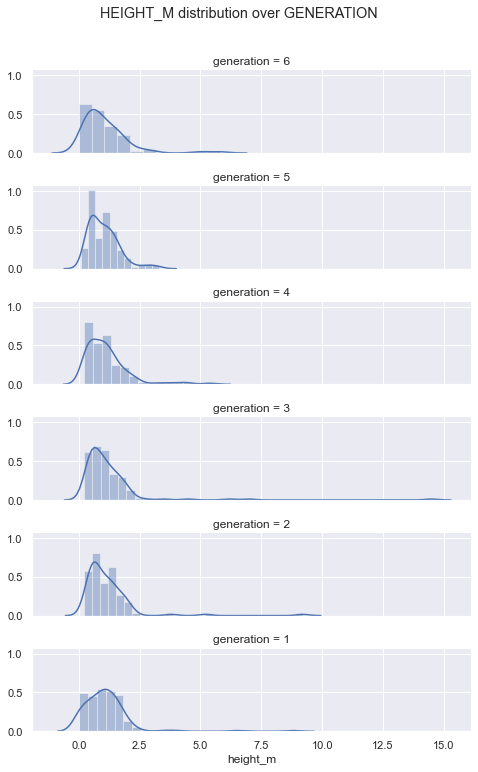

In [22]:
hist_gen_plot(df_groupe1,"height_m","generation")

Plotting the height over generations shows that eventhough skewness was used to describe its distribution, it seems nonetheless uniform for each generation with some outliers being the tall pokmeons. For some generation, such distribution is much spread out as for generations 4 and 6. The hight concentration of pokemon seems however to be seen for the same range of heights across the generations.

__Figure 3__ 

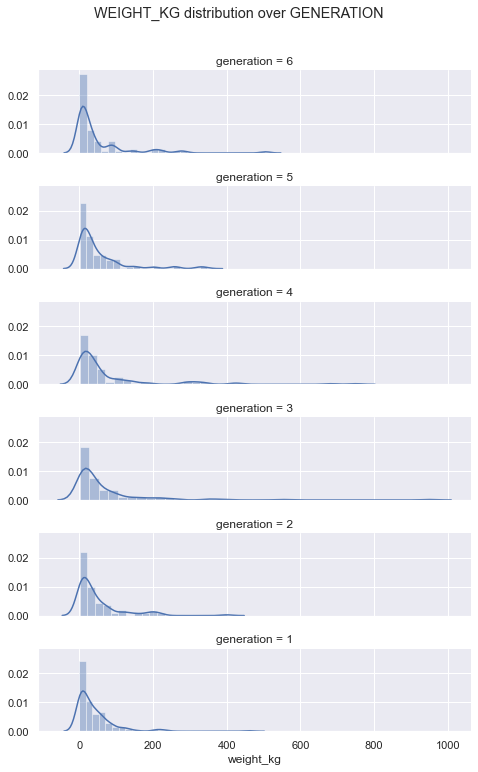

In [23]:
#weight  distribution per generation 
hist_gen_plot(df_groupe1,"weight_kg","generation")

Plotting the weight over generations confirms the skewness found before. However, distributions seem to be similar across generations 

__Figure 4__ 

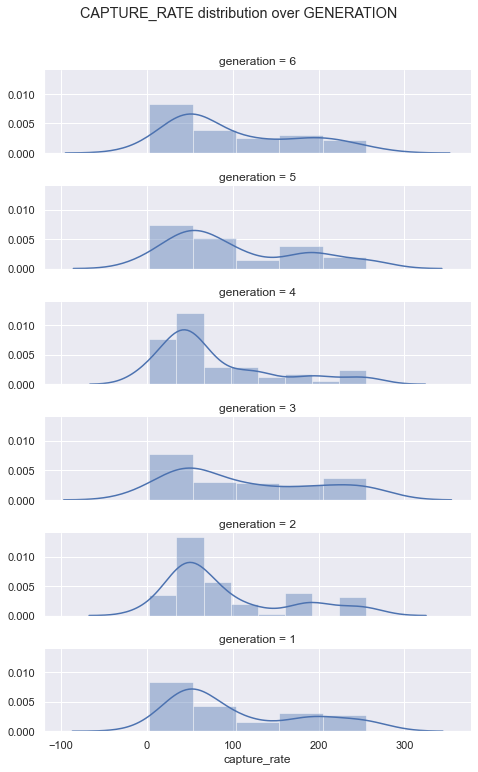

In [24]:
#capture rate distribution per generation 
hist_gen_plot(df_groupe1,"capture_rate","generation")




The capture rate varies across the generations. For most generation, the distribution is bimodal, with varying peak intensities around 50 and 200.

__Figure 5__ 

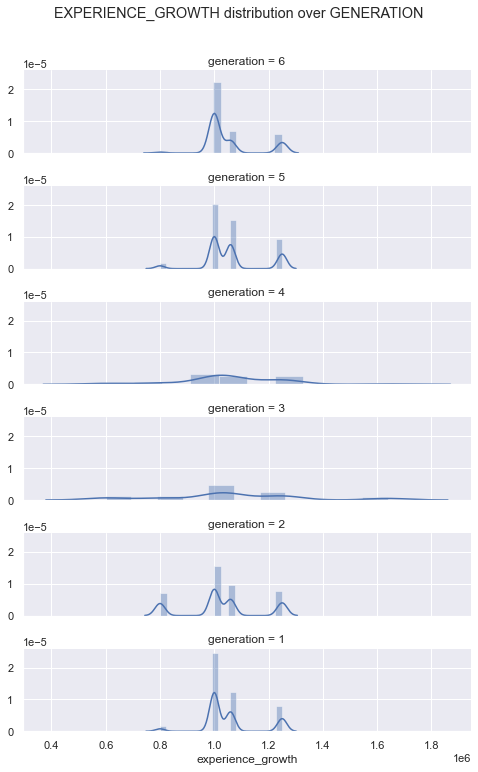

In [25]:
#growth experience distribution per generation 
hist_gen_plot(df_groupe1,"experience_growth","generation")



The categorical behaviour of the experience growth is confirmed for each generation. We clearly see however 3 different patterns. One shared across generations 1 and 6 one,  for generations 2 and 5,  and  for the two remaining. This shows that a clear choice was made here from generation to the other. This high variations might indicate that it can be an important feature for pokemons. 

__Figure 6__ 

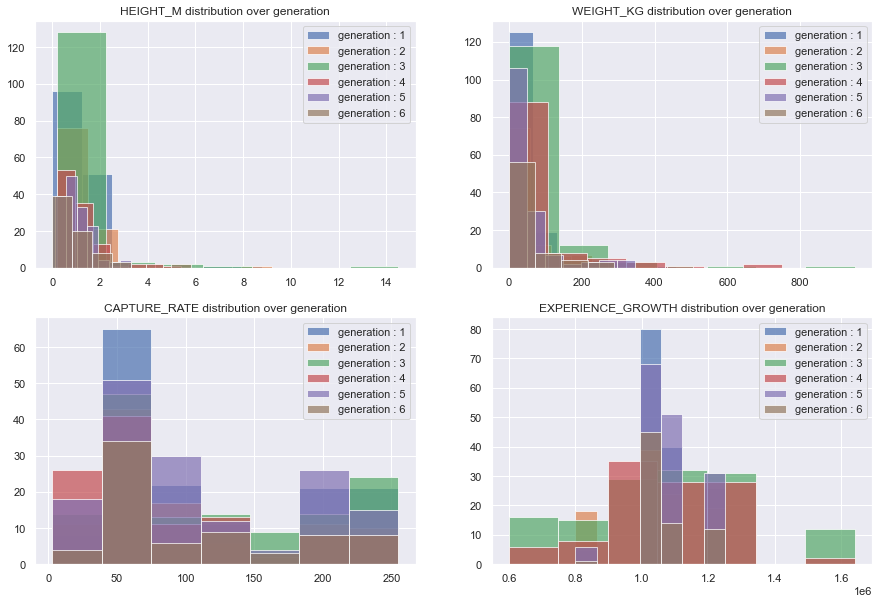

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(15, 10))

list_=['height_m', 'weight_kg', 'capture_rate','experience_growth']



hatches = ('','','','','',',')  # fill pattern
for  j, ax in zip(range(4), axes.flat):
    for (i, d),hatch in zip(df_groupe1.groupby('generation'), hatches):
        fig=d[list_[j]].hist(alpha=0.7,bins=7, ax=ax, label='generation : '+str(i), hatch=hatch)
        lg =ax.legend()
        ttl=ax.set_title(str(list_[j]).upper() + ' distribution over ' + str('generation'))

To complete the comparison over generations. Choise was made to visualize the distribution of all generations toguether for the continuous variables. First off, we can clearly see that genration 1 and 2  had larger amount of smaller and lighter pokemons. Height and weight  across the last 3 generations were aswell approximately the same. As for experience growth, the pattern difference is clearly observed. For instance, some generations being more or less uniform (generation 3 and 4) and other not. 

__Figure 7__ 

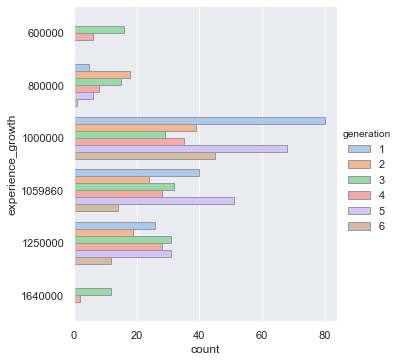

In [33]:
sns.catplot(y="experience_growth", hue="generation", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_groupe1);

To complete on those patterns differences. This plot clearly shows how the number of pokemons for a given experience growth changes from one generation to another. For instance massive drop of that number is experience for an experienceg growth of 100000000 for the first 3 generations. It then raises up again significatively at the 4th generation before droping down again. 

__Figure 8__ 

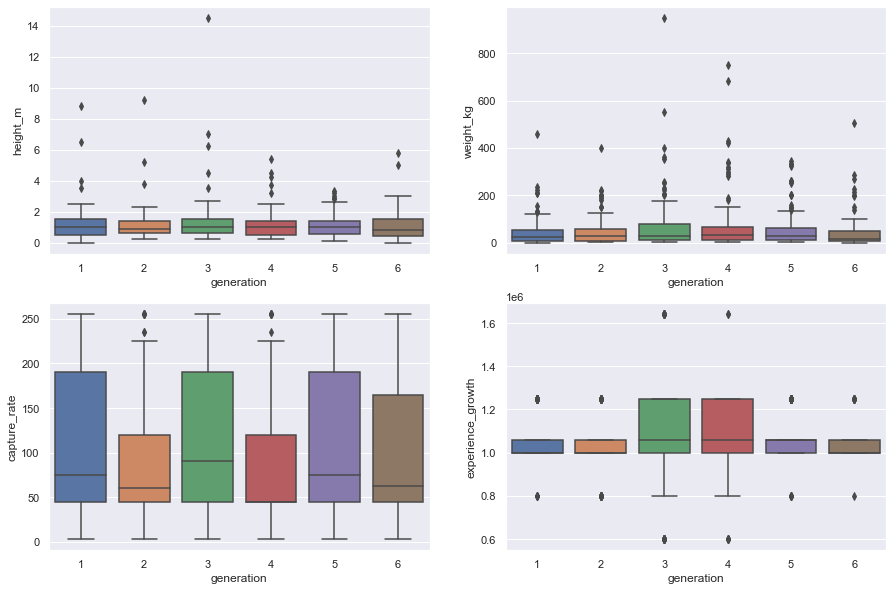

In [36]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(15, 10))
list_=['height_m', 'weight_kg', 'capture_rate','experience_growth']
for i, ax in zip(range(4), axes.flat):
    sns.catplot(x="generation", y=list_[i], kind="box",ax=ax,orient='v', data=df_groupe1)
    plt.close()

Barplotting the various continuous variables across generations also helps validating the previous insights. One can mention that weights and heeights for generations 3 and 4 and 5 more spread out as the interquartile distances are bigger compared to the other generations. The divesity for the capture rate appears to be quite periodic throughout the generations. A high diversity followed by a much smaller is seen one from one generation to the other. 


__Figure 9__ 

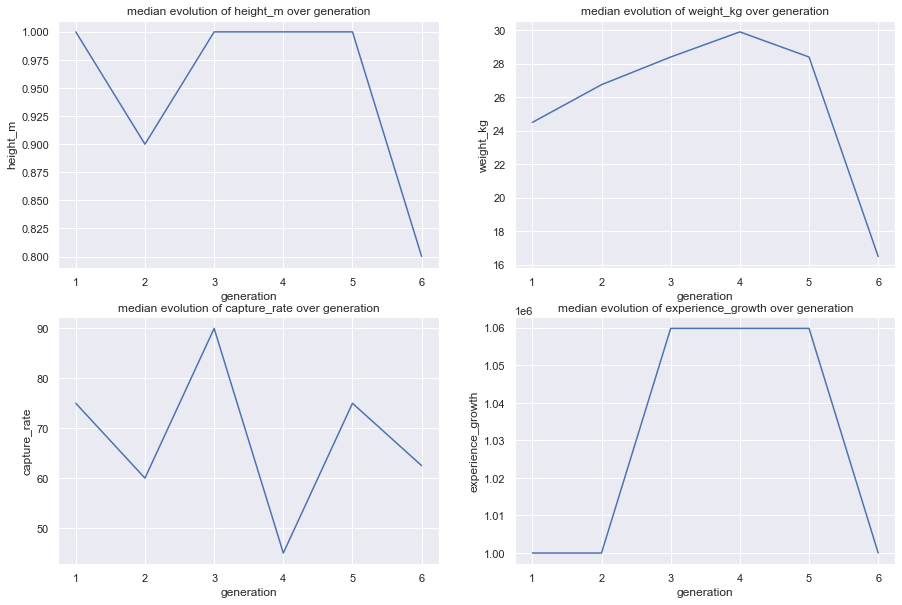

In [27]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(15, 10))
list_=['height_m', 'weight_kg', 'capture_rate','experience_growth']
for i, ax in zip(range(4), axes.flat):
    med_growth_evol= df_groupe1.groupby('generation')[list_[i]].median()\
                              .to_frame().reset_index()
    
    fl = sns.lineplot(x="generation", y=str(list_[i]),
                   data=med_growth_evol,ax=ax)
    ax.set_title('median evolution of '+str(list_[i])+ ' over generation' )



Plotting the median across the generations also helps visualizing the differences and shifts frome one to another. Here, one can mention how similar generation 3, 4 and 5 are with respect to higth and experience growth. The weigths are slightly increased then descreased across those generatio. As for the capture rate it is more then ever periodic. One sould point out how the last generation stands out as a peak for the various medians is generally observed at the fifth generation, a net decrease is then experienced for that generation. Lowest median is observed for the median at generation 6 for 3 out 4 variables. 

### Group 1 string variables


In [31]:
#Top 10 abilities all generations toguether 
df_groupe1.abilities.explode().value_counts().sort_values(ascending=False).to_frame()[:10]\
                              

,abilities
Sturdy,39
Swift Swim,38
Chlorophyll,35
Levitate,32
Keen Eye,31
Inner Focus,29
Intimidate,28
Pressure,25
Swarm,24
Sheer Force,24


__Figure 10__ 

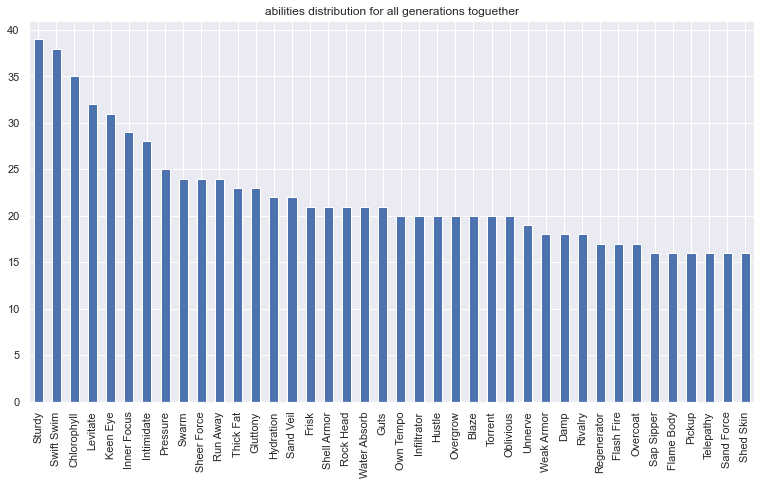

In [32]:
plt.figure(figsize=(13,7))

plot=df_groupe1.abilities.explode().value_counts().sort_values(ascending=False)[:40]\
    .plot(kind='bar')
ttl=plt.title('abilities distribution for all generations toguether')

One can mention that the abilities are skewed. However, the rate of the skewness is quit slow 

In [33]:
#most present abilities all generation together 
top_abs=df_groupe1.groupby('generation')['abilities'].apply(lambda x: x.explode())\
                                             .to_frame().count(level='generation')\
                                             .reset_index()
                                            
top_abs                                       

,generation,abilities
0,1,438
1,2,261
2,3,309
3,4,246
4,5,400
5,6,166


It is interesting to point out here hwo the number of abilities were divided by two beween the first and second genereation, then doubled again in the time span of 3 generations. 

__Figure 11__ 

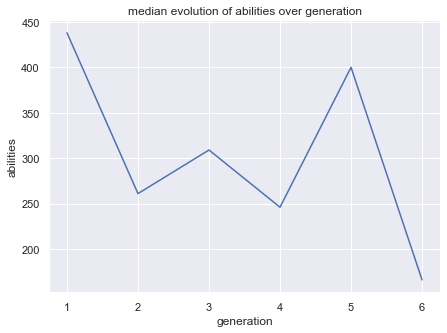

In [34]:
plt.figure(figsize=(7,5))
plt.title('median evolution of abilities over generation')
ax = sns.lineplot(x="generation", y="abilities",data=top_abs)

Here one can point out how the number of abilities drastically fell across the generation with a reduction of approximatly 280 abilities which is roughly what was experienced in generation 2, 3 and 4. 

In [35]:
#most present abilities generation wise
abs_gen=df_groupe1.groupby('generation')['abilities'].apply(lambda x: x.explode())\
                                            .to_frame().reset_index()\
                                            .rename(columns={'level_1':'pokedex_numbder'})\
                                            .groupby('generation')['abilities']\
                                            .value_counts().sort_values(ascending=False)\
                                            .to_frame()\
                                            .rename(columns={'abilities':'count'})\
                                            .reset_index()
abs_gen.head()
                                                 


,generation,abilities,count
0,1,Swift Swim,13
1,1,Chlorophyll,12
2,5,Swarm,12
3,1,Inner Focus,11
4,1,Run Away,11


In [74]:
def plot_hist_gen_str(data,var_x,var_row): 
    fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(40 ,30))
    for i, ax in zip(range(6), axes.flat):
        abs_gen_ = data[data[var_row] == i+1]
        plot=abs_gen_[:20].plot(x=var_x,y='count',kind='bar',ax=ax)
        ax.set_title(str(var_x)+' distribution for generation '+str(i+1))



__Figure 12__ 

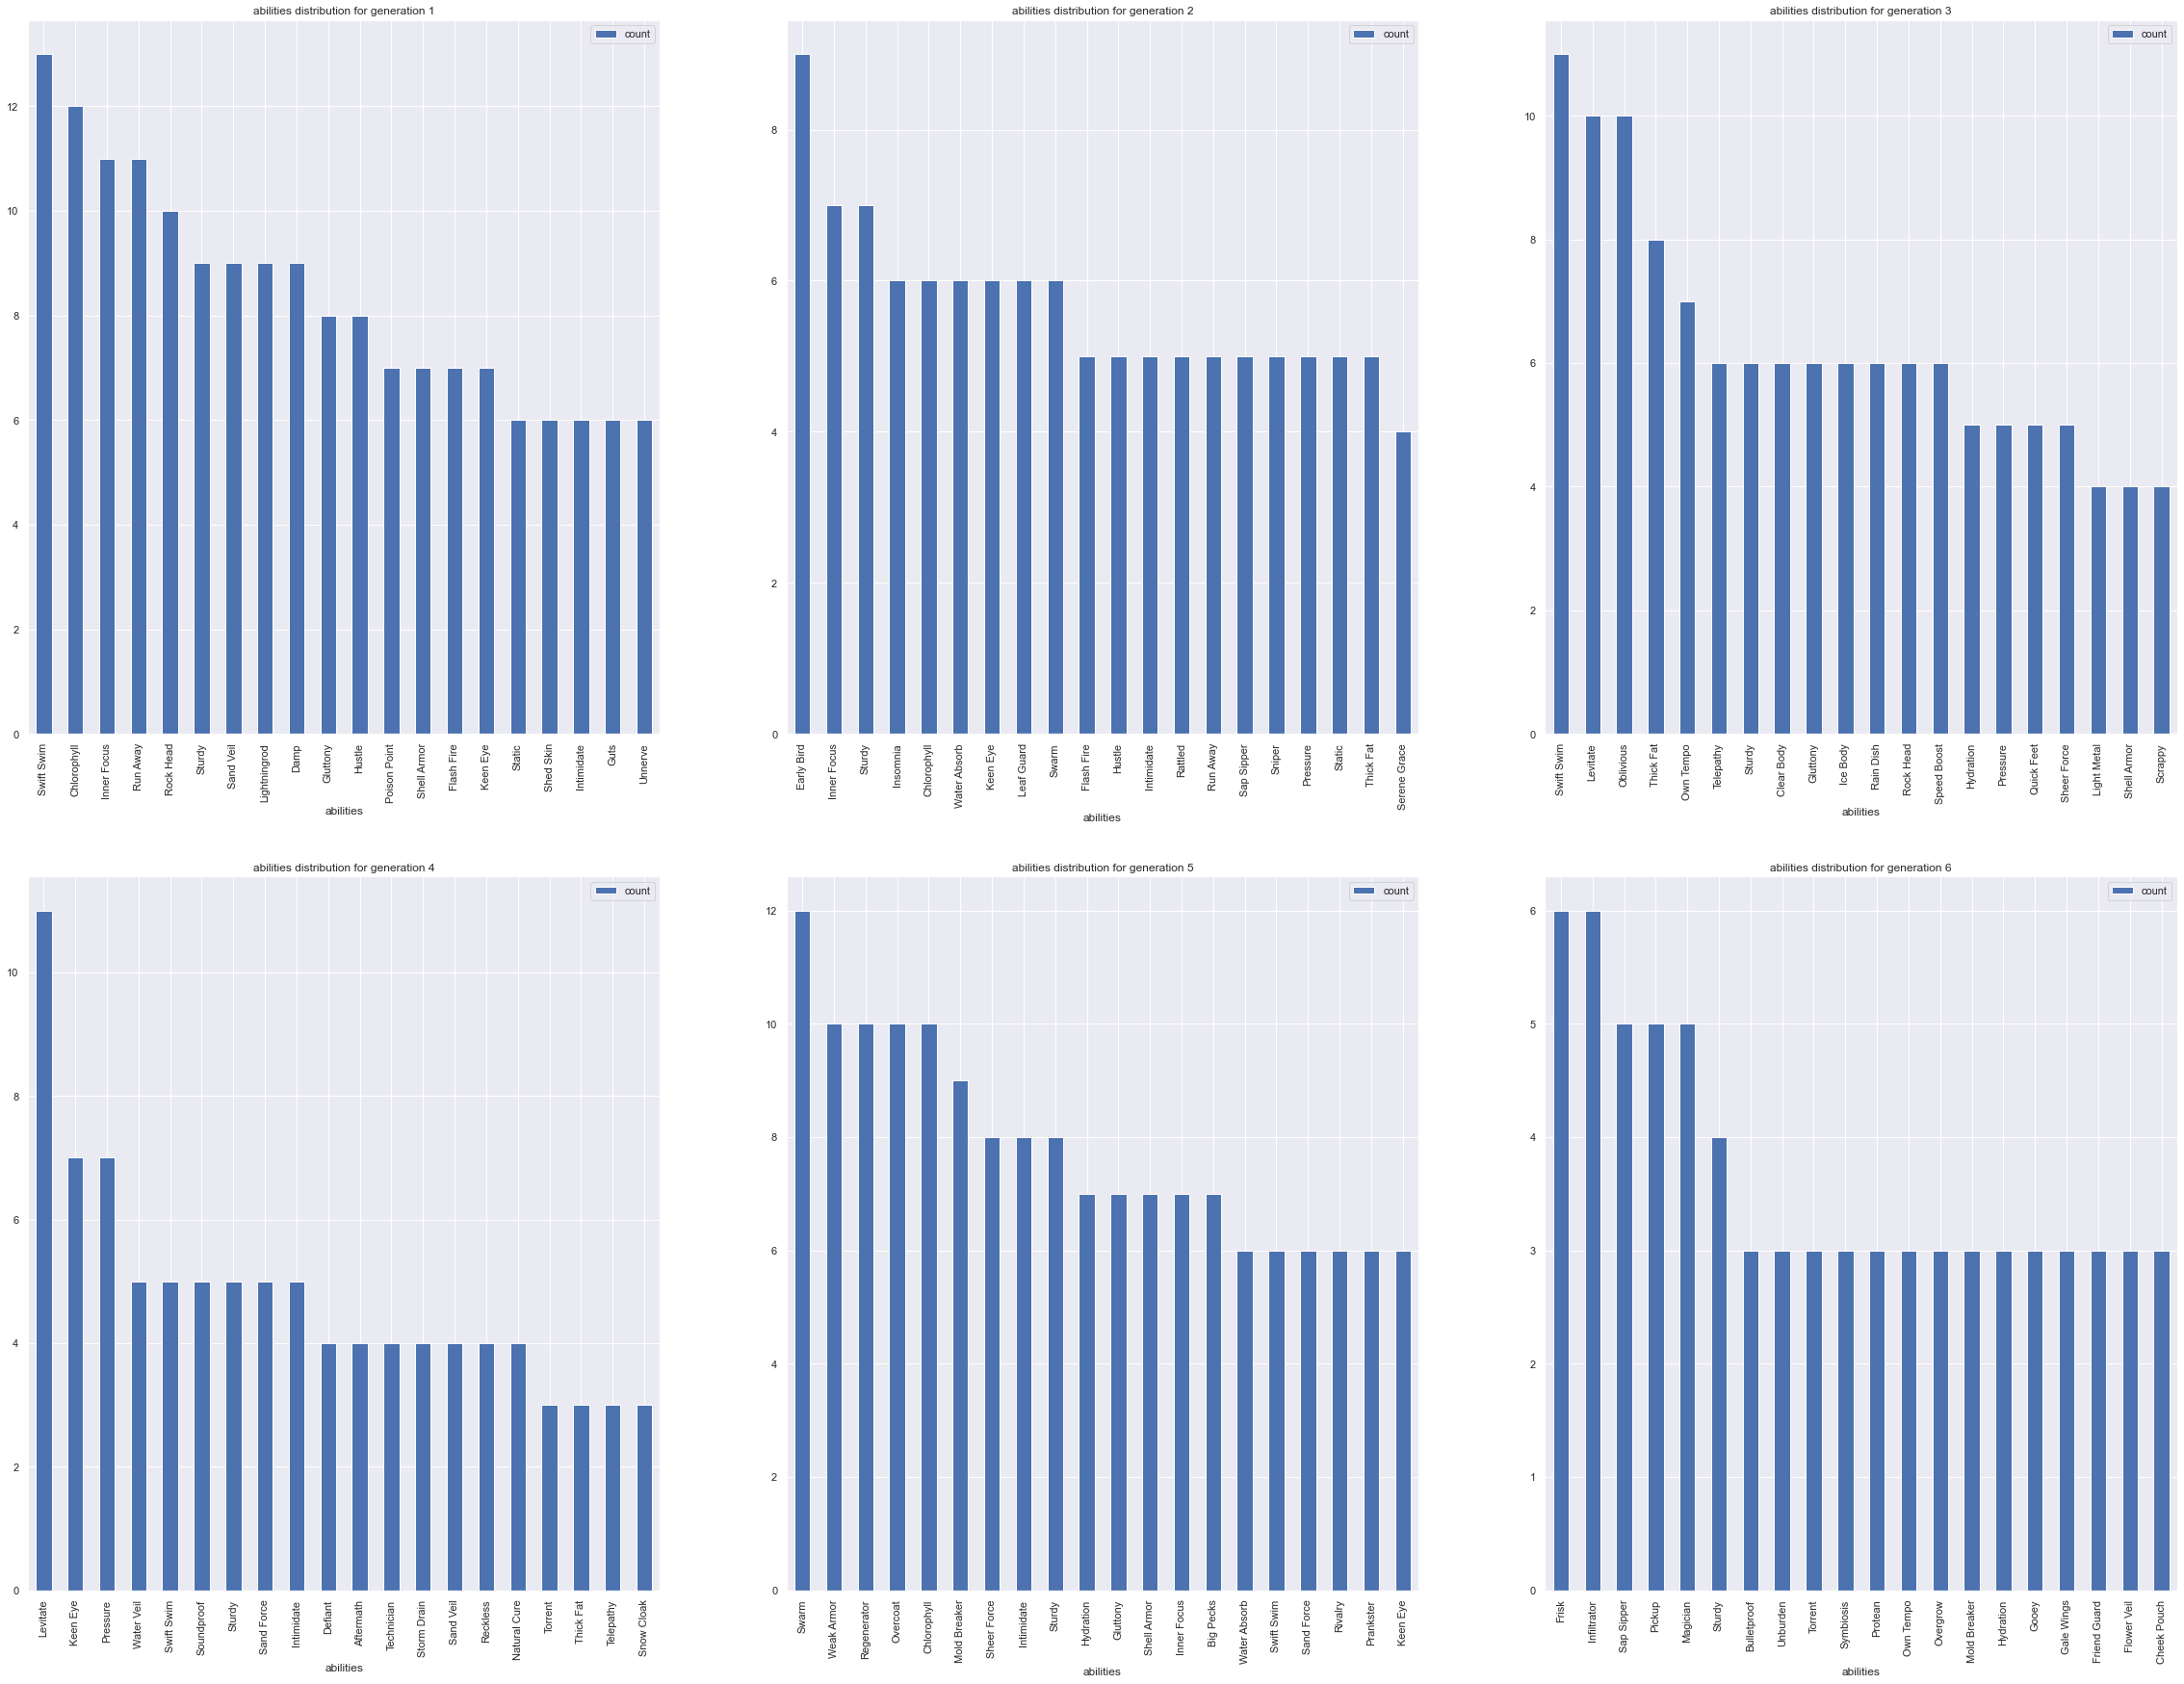

In [75]:
plot_hist_gen_str(abs_gen,"abilities","generation")

Interestingly the distribution pattern (shape) is somewhat the same across generations. However one should mention the diversity among the top abilities for the various generations. The top abilities really changes from one generation to another. This shows also how the number of abilitie per generation affects the overall distribution. For instance, swift swim ranks which ranked second in the overall distribtion is here  first in first and third generations which have a large number of abilties. 

In [40]:
all_classes=set(df_groupe1['type1']).union(set(df_groupe1['type2']))
all_classes.remove(np.nan)
print(all_classes)

{'ice', 'poison', 'fire', 'psychic', 'electric', 'bug', 'ghost', 'rock', 'steel', 'dragon', 'ground', 'dark', 'fighting', 'fairy', 'normal', 'grass', 'flying', 'water'}


In [41]:
# Types processing, creating an array from the two types
df_groupe1["types"]= df_groupe1.applymap(lambda x: x)\
                                .apply(lambda x: [x.type1,x.type2], axis=1)





In [42]:
#most present abilities all generation together 
types = df_groupe1.types.explode().value_counts().sort_values(ascending=False)\
                    .to_frame()
types.head()

,types
water,118
normal,97
flying,90
grass,85
psychic,74


__Figure 13__ 

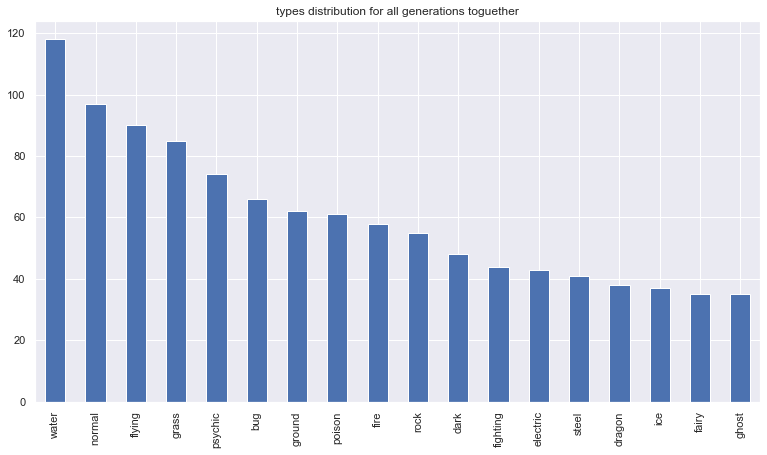

In [43]:
plt.figure(figsize=(13,7))

plot=df_groupe1.types.explode().value_counts().sort_values(ascending=False)[:40]\
    .plot(kind='bar')
tlt = plt.title('types distribution for all generations toguether')




In [44]:

types_gens=df_groupe1.groupby('generation')['types'].apply(lambda x: x.explode())\
                                            .to_frame().reset_index()\
                                            .rename(columns={'level_1':'pokedex_numbder'})\
                                            .groupby('generation')['types']\
                                            .value_counts().sort_values(ascending=False)\
                                            .to_frame()\
                                            .rename(columns={'types':'count'})\
                                            .reset_index()
                                            
types_gens.head()
                                          

,generation,types,count
0,1,poison,35
1,1,water,32
2,3,water,28
3,1,normal,22
4,5,grass,20


__Figure 14__ 

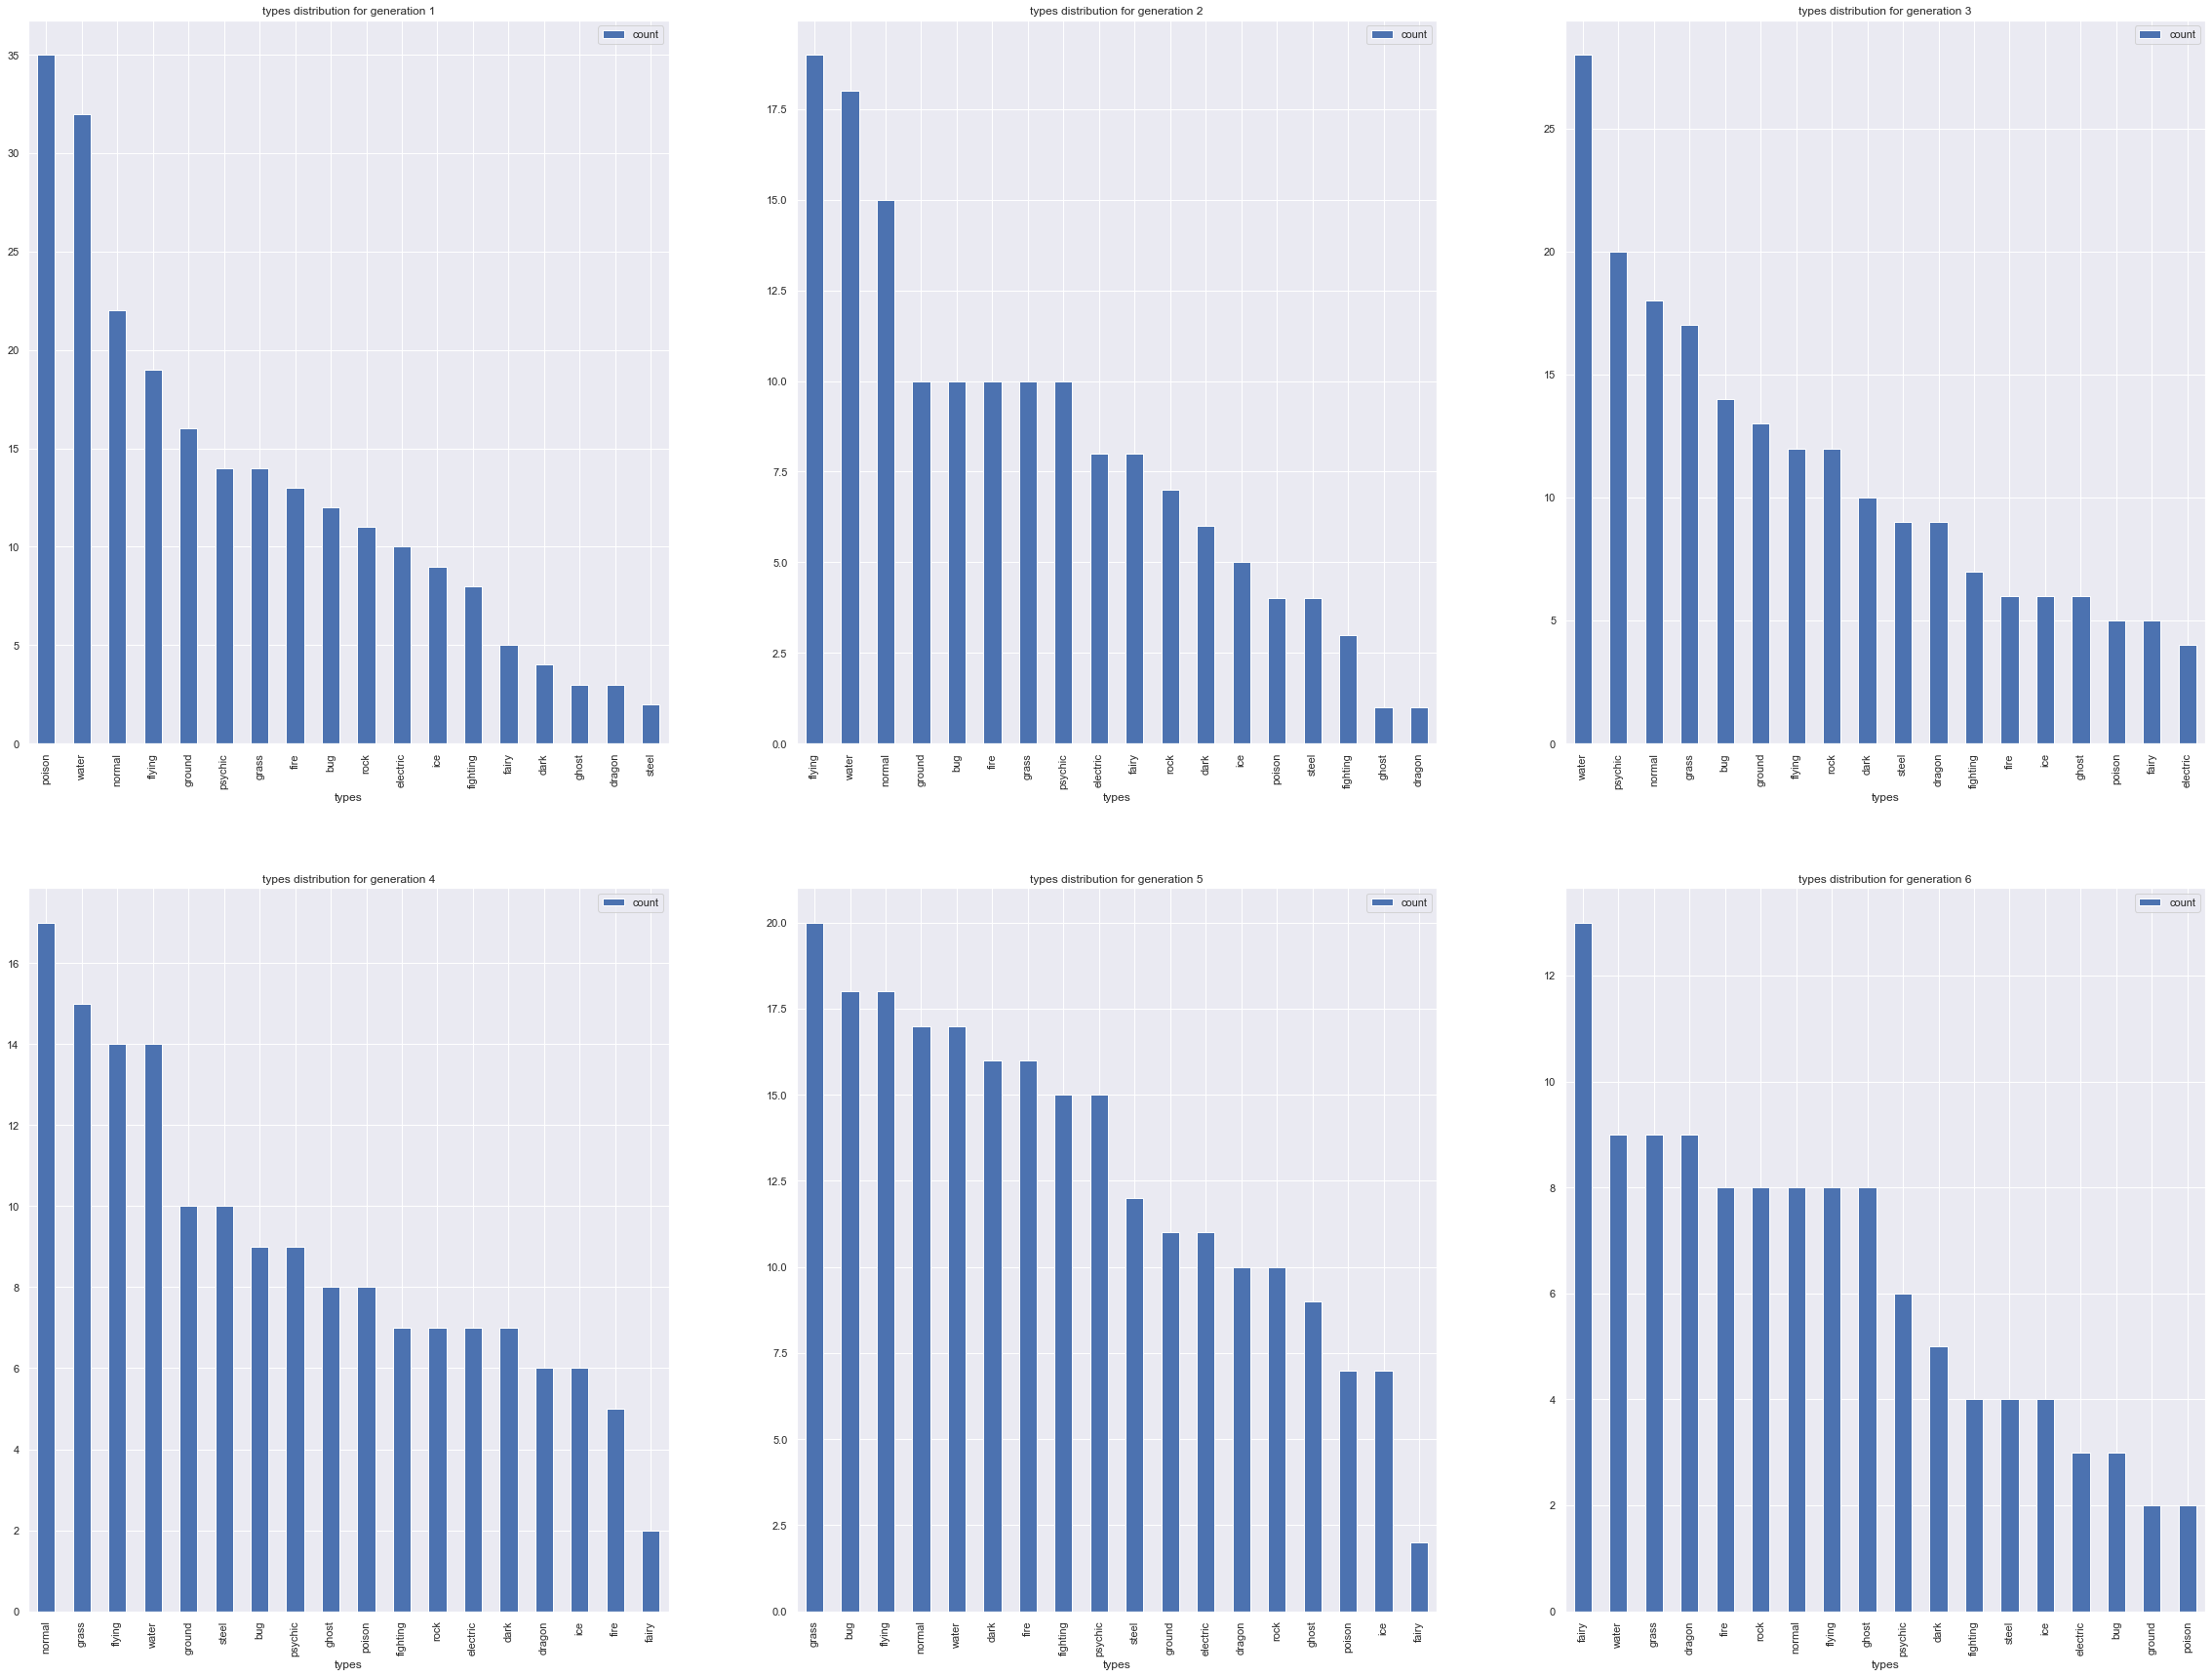

In [77]:
plot_hist_gen_str(types_gens,"types","generation")

Here, distribution pattern seems to be the same aswell aross generations. However, some types tend to be present across many generations top 5's. Water, flying, grass,ground andd normal fall in that category. 

In [46]:
#### String categories inverstigation group 1

#### String categories inverstigation group 1

In [47]:
#
df_words= df_groupe1[['name','pokedex_number','abilities','types','classification']].copy()

In [48]:
df_groupe1.head()

,pokedex_number,name,type1,type2,classification,height_m,weight_kg,capture_rate,experience_growth,generation,abilities,types
0,1,Bulbasaur,grass,poison,Seed Pokémon,0.7,6.9,45,1059860,1,"[Overgrow, Chlorophyll]","[grass, poison]"
1,2,Ivysaur,grass,poison,Seed Pokémon,1.0,13.0,45,1059860,1,"[Overgrow, Chlorophyll]","[grass, poison]"
2,3,Venusaur,grass,poison,Seed Pokémon,2.0,100.0,45,1059860,1,"[Overgrow, Chlorophyll]","[grass, poison]"
3,4,Charmander,fire,NaN,Lizard Pokémon,0.6,8.5,45,1059860,1,"[Blaze, Solar Power]","[fire, nan]"
4,5,Charmeleon,fire,NaN,Flame Pokémon,1.1,19.0,45,1059860,1,"[Blaze, Solar Power]","[fire, nan]"


In [49]:
df_groupe1.shape

(721, 12)

In [50]:
a=df_words.abilities.explode().to_frame().reset_index()
b=df_words.types.explode().to_frame().reset_index()
merged_words=pd.merge(a,b)

In [51]:
print("number of types", b.types.nunique())

number of types 18


In [52]:
print("number of abilities", a.abilities.nunique())

number of abilities 193


In [53]:
corr_words= merged_words.copy()
corr_words['abilities']=corr_words['abilities'].astype('category').cat.codes
corr_words['types']=corr_words['types'].astype('category').cat.codes

In [54]:
# tried caegorical coding of attributs to see correlation 
#unconclusive results
corr_words.corr()

,index,abilities,types
index,1.000000,-0.023644,-0.083976
abilities,-0.023644,1.000000,0.038302
types,-0.083976,0.038302,1.000000


Pearson correlation was attempted here by tunring both abilities and types into numerical categories. However, one can conclued that this approach was incuclusive as the coefficiants are really low. 

In [71]:
# function for counting values occurences in a given feature 
def count_feature(merged_data,category):
    return merged_data[category].explode()\
                                .value_counts().sort_values(ascending=False)\
                                .to_frame().reset_index().rename(columns={category:"count"})\
                                .rename(columns={"index":category})\
                                .set_index(category)
# function for counting values occurences in a given feature according to another
def count_occurences(merged_data, var1, var2):
    return  merged_data.groupby([var1, var2])\
                                                        .count()\
                                                        .rename(columns={"index":"count_"})\
                                                        .reset_index().sort_values(ascending=False,by="count_")
# Function for calcutating the rate of appearences of one feature with respect to the other
def occurence_fractions(data1,data2, var1,va2):
    data1['abb_occ'] = data1[var1]\
                                                 .apply(lambda x: data2.loc[x] )
    data1['fraction_%'] =(data1['count_']/data1['abb_occ'])*100
    data1 = data1.set_index([var1, va2])

__Table 1__ 

In [57]:
#Abilities number after exploding types and abilities columns
counted_abs=count_feature(merged_words,"abilities")
counted_abs.head()

,count
abilities,
Sturdy,78
Swift Swim,76
Chlorophyll,70
Levitate,64
Keen Eye,62


__Table 2__ 

In [58]:
# Number of occurence of abilities and types toguether 
abilities_vs_types = count_occurences(merged_words,'abilities', 'types')
abilities_vs_types.head()

,abilities,types,count_
62,Chlorophyll,grass,35
777,Swift Swim,water,35
746,Sturdy,rock,28
759,Swarm,bug,24
608,Sand Veil,ground,22


__Table 3__ 

In [59]:
# Divied the number of type - abilities occurences by the number of abilities occurences
# Gives the proportion of a specific ability for a given type 
occurence_fractions(abilities_vs_types,counted_abs,"abilities","types")
abilities_vs_types.sort_values(ascending=False, by='fraction_%')[:10]

,abilities,types,count_,abb_occ,fraction_%
901,Zen Mode,fire,2,2,100.000000
498,Power of Alchemy,poison,4,4,100.000000
785,Tangling Hair,ground,4,4,100.000000
758,Surge Surfer,electric,2,2,100.000000
30,Arena Trap,ground,5,6,83.333333
494,Poison Touch,poison,12,18,66.666667
727,Stench,poison,9,14,64.285714
717,Static,electric,16,30,53.333333
525,Pure Power,psychic,2,4,50.000000
825,Tough Claws,rock,2,4,50.000000


This investigation was made to asses relation between abilities and types. Especially if the y were redundancies between the two. This might come in handy in a recommander system. Fraction vaiable 
The results showed above seem to be consistent looking at relations betwen 'Arena Trap' ability which is present in 83% of the ground pokemons. Such investigation can be also conducted generation wise

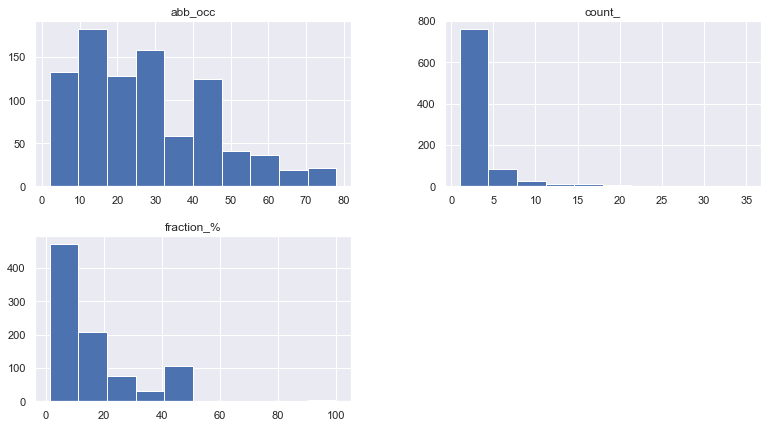

In [60]:

hist= abilities_vs_types.hist(figsize=(13,7))

Distribution were also ploted. Here, it was to asses how much were the redundancies present between the two variables. We can see that it is not so common as the distribution is skewed to the right but such distribution might spread if conducted generation wise. 

__Table 4__ 


In [62]:
classification_exploded=count_feature(merged_class_abs,"classification")
classification_exploded.head()

,count
classification,
Mouse Pokémon,25
Dragon Pokémon,20
Mushroom Pokémon,16
Balloon Pokémon,15
Mole Pokémon,15


In [61]:
merged_class_abs=pd.merge(df_words.abilities.explode().to_frame()\
                      .reset_index(),df_groupe1.classification\
                      .to_frame().reset_index())
merged_class_abs.head()

,index,abilities,classification
0,0,Overgrow,Seed Pokémon
1,0,Chlorophyll,Seed Pokémon
2,1,Overgrow,Seed Pokémon
3,1,Chlorophyll,Seed Pokémon
4,2,Overgrow,Seed Pokémon


__Table 5__ 

In [63]:
abilities_vs_class=count_occurences(merged_class_abs,"abilities","classification")
abilities_vs_class.head()


,abilities,classification,count_
196,Effect Spore,Mushroom Pokémon,6
935,Sand Force,Mole Pokémon,5
90,Chlorophyll,Seed Pokémon,4
775,Poison Touch,Sludge Pokémon,4
691,Overcoat,Bagworm Pokémon,4


__Table 6__ 

In [64]:

# Divied the number of classification - abilities occurences by the number of abilities occurences
# Gives the proportion of a specific ability for a given classification
occurence_fractions(abilities_vs_class,classification_exploded,"classification","abilities")

abilities_vs_class.sort_values(ascending=False, by='fraction_%')[:100]

,abilities,classification,count_,abb_occ,fraction_%
484,Justified,Cavern Pokémon,1,1,100.0
485,Justified,Colt Pokémon,1,1,100.0
488,Justified,Iron Will Pokémon,1,1,100.0
538,Levitate,EleFish Pokémon,3,3,100.0
1393,Victory Star,Victory Pokémon,1,1,100.0
...,...,...,...,...,...
1081,Snow Cloak,Freeze Pokémon,1,2,50.0
1074,Sniper,Poison Bee Pokémon,1,2,50.0
1153,Storm Drain,Barnacle Pokémon,1,2,50.0
1159,Strong Jaw,Despot Pokémon,1,2,50.0


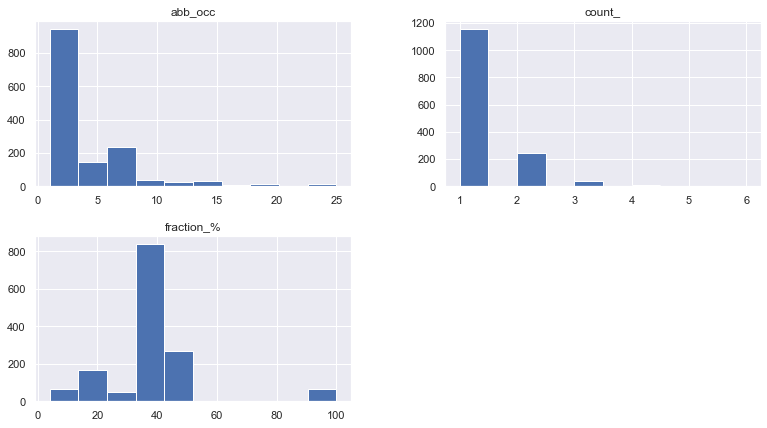

In [65]:
hist=abilities_vs_class.hist(figsize=(13,7))

Here, it might be relevant to mention such relationship between abilities and pokemon classification as the fraction figures are mostly between 30-50 % with a subgroup having 100% occurence fraction.

In [66]:
merged_class_types=pd.merge(df_words.types.explode().to_frame()\
                      .reset_index(),df_groupe1.classification\
                      .to_frame().reset_index())



__Table 7__ 

In [67]:
types_count=count_feature(merged_class_types,"types")

types_count.head()

,count
types,
water,118
normal,97
flying,90
grass,85
psychic,74


__Table 9__ 

In [68]:
types_vs_class =count_occurences(merged_class_types,'types','classification')

types_vs_class[:10]

,types,classification,count_
98,dragon,Dragon Pokémon,6
390,grass,Mushroom Pokémon,6
159,fairy,Fairy Pokémon,5
441,ground,Mole Pokémon,5
227,fire,Flame Pokémon,5
228,fire,Fox Pokémon,5
259,flying,Bat Pokémon,4
602,poison,Sludge Pokémon,4
8,bug,Cocoon Pokémon,4
427,ground,Drill Pokémon,4


__Table 10__ 

In [69]:

# Divied the number of classification - types occurences by the number of abilities occurences
# Gives the proportion of a specific type for a given classification

occurence_fractions(types_vs_class,types_count,"types","classification")

types_vs_class.sort_values(ascending=False, by='fraction_%')[:100]



,types,classification,count_,abb_occ,fraction_%
98,dragon,Dragon Pokémon,6,38,15.789474
159,fairy,Fairy Pokémon,5,35,14.285714
227,fire,Flame Pokémon,5,58,8.620690
228,fire,Fox Pokémon,5,58,8.620690
152,fairy,Balloon Pokémon,3,35,8.571429
...,...,...,...,...,...
580,poison,Drill Pokémon,2,61,3.278689
591,poison,Mushroom Pokémon,2,61,3.278689
595,poison,Poison Gas Pokémon,2,61,3.278689
590,poison,Mock Kelp Pokémon,2,61,3.278689


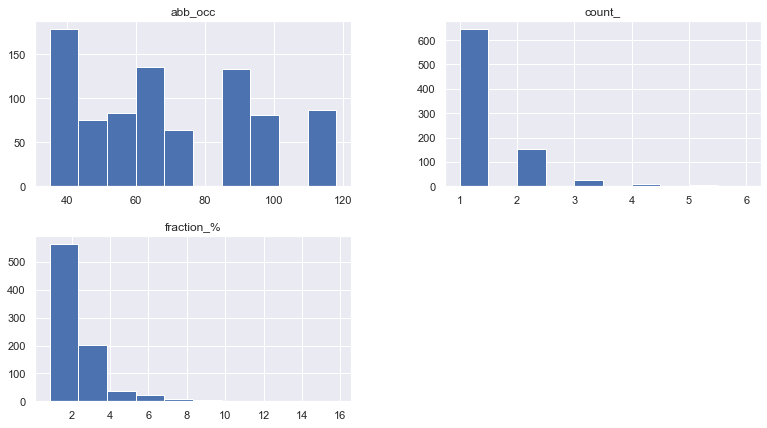

In [70]:
hist=types_vs_class.hist(figsize=(13,7))

Here, the relationship between the two variables is not so very relevant as most fractions experience low values, with a max around 15%

##### As a general comment, one should mention that further analysis can be conducted generation wise to investigate such relationships. It would, for sure, show some ineresting results and therefor be of use in our recommender system  

### Feature-group 2
1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS



	•	against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
	•	hp: The Base HP of the Pokemon
	•	attack: The Base Attack of the Pokemon
	•	defense: The Base Defense of the Pokemon
	•	sp_attack: The Base Special Attack of the Pokemon
	•	sp_defense: The Base Special Defense of the Pokemon
	•	speed: The Base Speed of the Pokemon
	•	is_legendary: Denotes if the Pokemon is legendary.
	•	Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).

In [51]:
selected_2 = ['pokedex_number','name','hp','attack','defense','sp_attack',\
             'sp_defense','speed','is_legendary','base_total','generation']
df2 = df[selected_2]

KeyError: "['base_total', 'defense', 'hp', 'sp_attack', 'is_legendary', 'speed', 'attack', 'sp_defense'] not in index"

In [52]:
# Generation-wise hp distribution looks too cluttered when visualized with a line histogram
plot_genwise_line_hist(df2, 'hp', 'generation')

NameError: name 'plot_genwise_line_hist' is not defined

In [53]:
plot_genwise_box_hist(df2, 'hp', 'generation')

NameError: name 'plot_genwise_box_hist' is not defined

In [54]:
# Average hp of pokemon in all generations
sns.distplot(df['hp']);

KeyError: 'hp'

In [55]:
sns.distplot(df['attack']);

KeyError: 'attack'

In [56]:
sns.distplot(df['defense']);

KeyError: 'defense'

In [57]:
sns.distplot(df['sp_attack']);

KeyError: 'sp_attack'

In [58]:
sns.distplot(df['sp_defense']);

KeyError: 'sp_defense'

In [59]:
sns.distplot(df['speed']);

KeyError: 'speed'

In [60]:
sns.distplot(df['is_legendary']);

KeyError: 'is_legendary'

In [61]:
sns.distplot(df['base_total']);

KeyError: 'base_total'

#### Against_?

There are 18 against_? categories. 

In [62]:
sns.distplot(df['against_bug']);

KeyError: 'against_bug'

In [63]:
sns.distplot(df['against_dark']);

KeyError: 'against_dark'

In [64]:
sns.distplot(df['against_dragon']);

KeyError: 'against_dragon'

In [65]:
sns.distplot(df['against_electric']);

KeyError: 'against_electric'

In [66]:
sns.distplot(df['against_fairy']);

KeyError: 'against_fairy'

In [67]:
# TODO: Add a new column that is the sum of all against_? columns and plot its distribution

### Feature-group 3

1. If any of your features need preprocessing, preprocess it. 

2. Plot the distribution (i.e. histogram / bar chart ) of each feature. 

3. Plot scatterplots between meaningful pairs of features to identify any possible correlation. Also compute the correlation coefficients (Pearson and Spearman). 

4. Also consider any possible correlations that could occur between your set of features and the features from other groups.

5. EXPLAIN WHY FOR EACH OF THESE COMPUTATIONS

	•	base_happiness: Base Happiness of the Pokemon
	•	Color. Color of the Pokémon according to the Pokédex.
	•	hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
	•	EggGroup1. Egg Group of the Pokémon.
	•	EggGroup2. Second Egg Group of the Pokémon, in case it has two.
	•	baseeggsteps: The number of steps required to hatch an egg of the Pokemon
	•	hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
	•	Body_Style. Body Style of the Pokémon according to the Pokédex.


In [3]:
data = pd.read_csv("data/full_data_pkm.csv", sep=';')


In [4]:
happiness = data['base_happiness']
color = data['Color']
gender = data['hasGender']
egg1 = data['Egg_Group_1']
egg2 = data['Egg_Group_2']
egg_step = data['base_egg_steps']
mega = data['hasMegaEvolution']
body = data['Body_Style']
legendary = data['is_legendary']
generations = ['generation']

def count(data):
    content = []
    count=[]
    
    for i in data:
        new_content = True
        content_id=0
        for j in content:
            if i==j:
                new_content=False
                count[content_id]+=1
            content_id+=1
        if new_content and not pd.isnull(i):
            content.append(i)
            count.append(1)
            
    return content, count

def true_false_count(data):
    content = [True, False]
    count=[0, 0]
    
    for i in data:
        if i == True:
            count[0]+=1
        elif i == False:
            count[1]+=1
    
    return content, count

In [5]:
gens, gens_count = count(generations)

Text(0.5, 1.0, 'distribution of base happiness in pokemon population')

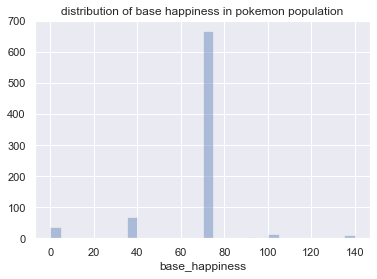

In [6]:
sns.distplot(happiness, kde=False).set_title('distribution of base happiness in pokemon population')

In [7]:
def create_barplot(data_, x_ax, sep):
    x_types, x_count = count(data_[x_ax])
    sep_types, sep_count = count(data_[sep])
    L = len(x_types)*len(sep_types)
    to_plot = np.empty((L, 3))
    st_column=np.empty((L, 1), dtype=object)
    rd_column=np.empty((L, 1), dtype=object)
    x_types.sort()
    sep_types.sort()
    for i in range(len(sep_types)):
        st_column[(i*len(x_types)):((i+1)*len(x_types))]= np.asarray(np.reshape((x_types), (len(x_types), 1)))
        rd_column[(i*len(x_types)):((i+1)*len(x_types))]= sep_types[i]
    st_column=np.reshape(st_column, (L))
    rd_column=np.reshape(rd_column, (L))
    nd_column=np.zeros((L, 1))
    to_count_x = data_[x_ax]
    to_count_sep = data_[sep]
    to_count_x = np.asarray(to_count_x)
    to_count_sep = np.asarray(to_count_sep)
    for i in range(len(data_)):
        for j in range(L):
            if(to_count_x[i]==st_column[j] and to_count_sep[i]==rd_column[j]):
                nd_column[j]+=1
                break
    nd_column=np.reshape(nd_column, (L)) 
    fig=sns.barplot(st_column, nd_column, rd_column).set_title('distribution of ' + x_ax + ' in pokemon population sorted by '+ sep)
    plt.xlabel(x_ax)
    plt.ylabel("count")
    plt.show(fig)
    


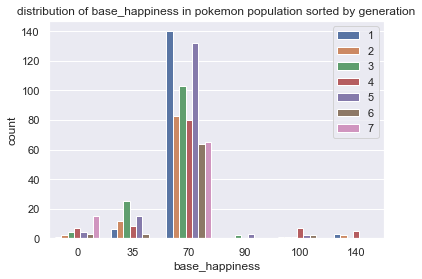

In [8]:
create_barplot(data, 'base_happiness', 'generation')

<BarContainer object of 10 artists>

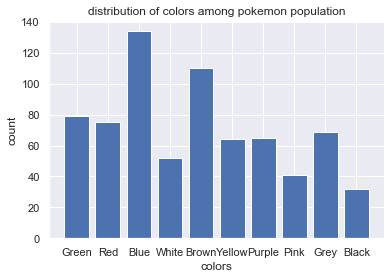

In [9]:
pok_colors, color_count = count(color)        
plt.xlabel("colors")
plt.ylabel("count")
plt.title("distribution of colors among pokemon population")
plt.bar(pok_colors, color_count)

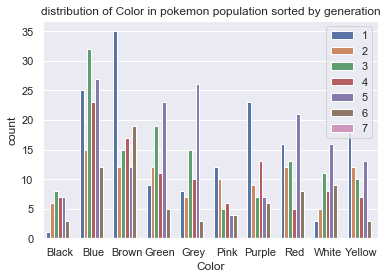

In [10]:
create_barplot(data, 'Color', 'generation')

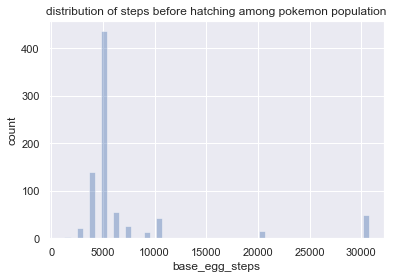

In [11]:
plt.ylabel("count")
plt.title("distribution of steps before hatching among pokemon population")
sns.distplot(egg_step, kde=False);

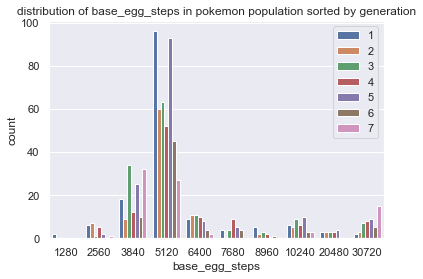

In [12]:
create_barplot(data, 'base_egg_steps', 'generation')

Text(0, 0.5, 'count')

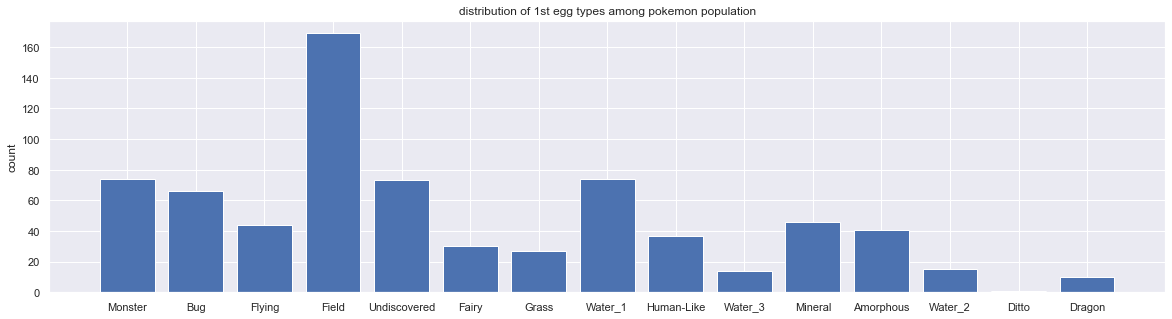

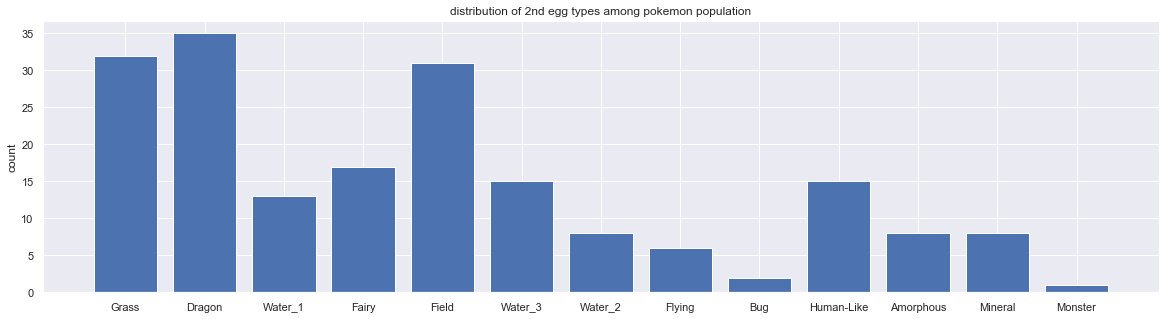

In [13]:
egg_types, egg_count = count(egg1)
plt.figure( figsize=(20, 5))
plt.bar(egg_types, egg_count)
plt.title("distribution of 1st egg types among pokemon population")
plt.ylabel("count")


egg_types2, egg_count2 = count(egg2)
plt.figure( figsize=(20, 5))
plt.bar(egg_types2, egg_count2)
plt.title("distribution of 2nd egg types among pokemon population")
plt.ylabel("count")

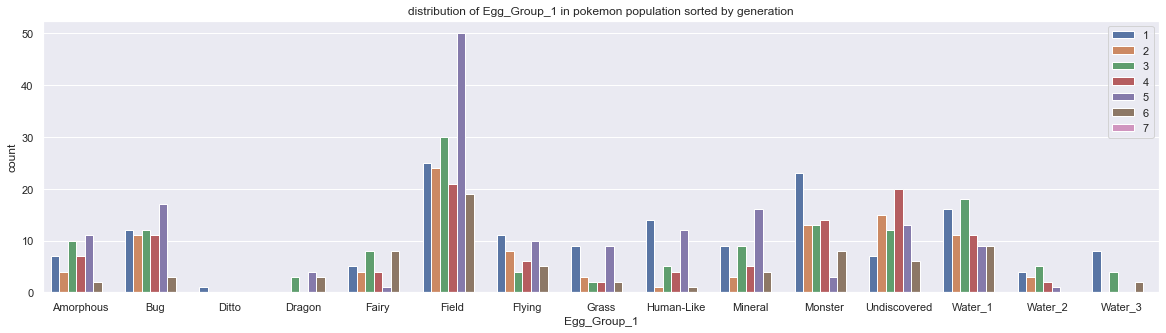

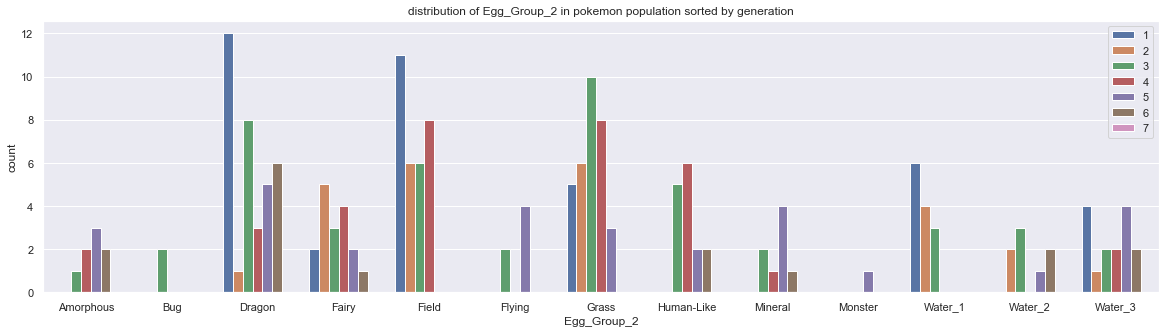

In [14]:
plt.figure( figsize=(20, 5))
create_barplot(data, 'Egg_Group_1', 'generation')
plt.figure( figsize=(20, 5))
create_barplot(data, 'Egg_Group_2', 'generation')

Text(0, 0.5, 'count')

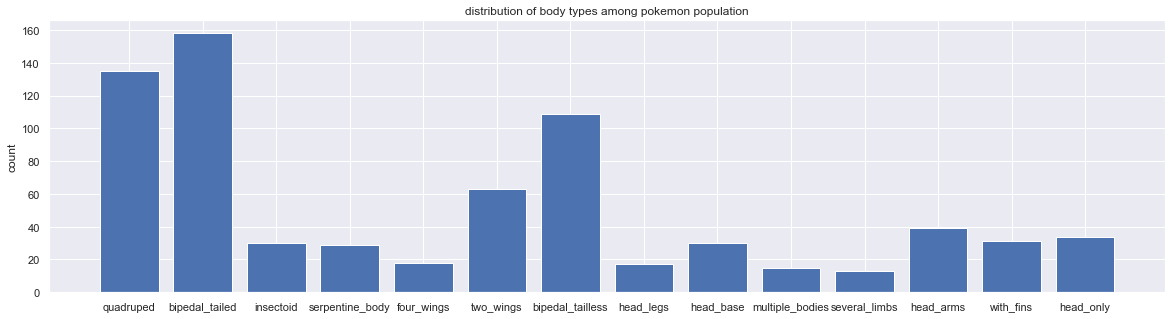

In [15]:
body_st, body_count = count(body)
plt.figure( figsize=(20, 5))
plt.bar(body_st, body_count)
plt.title("distribution of body types among pokemon population")
plt.ylabel("count")

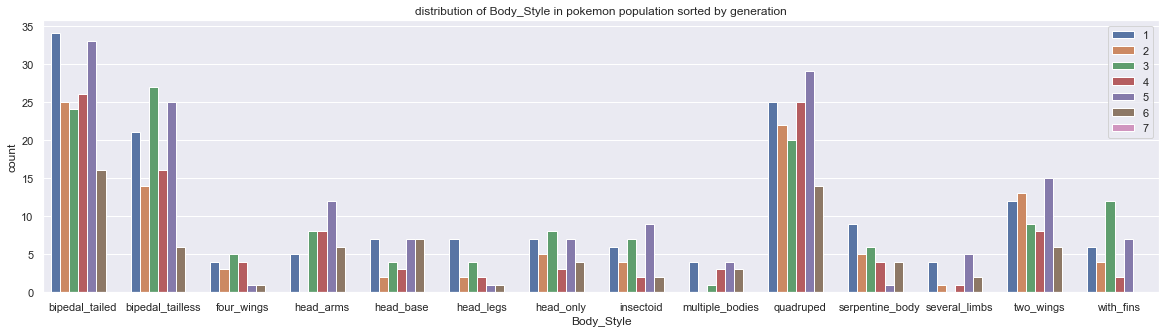

In [16]:
plt.figure( figsize=(20, 5))
create_barplot(data, 'Body_Style', 'generation')

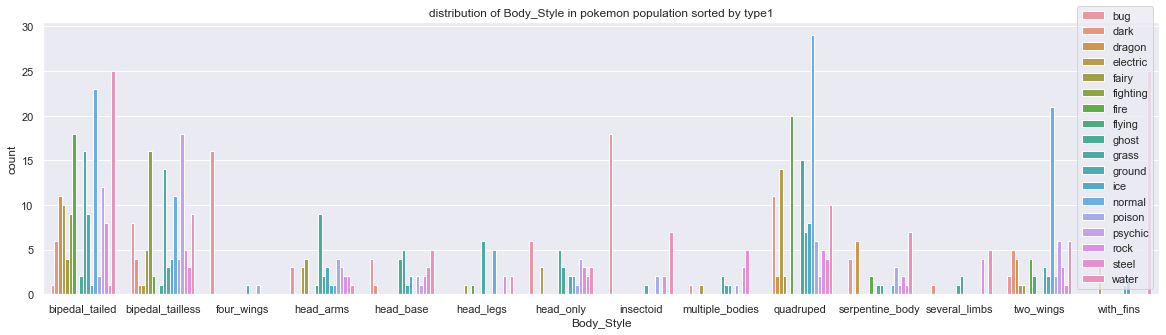

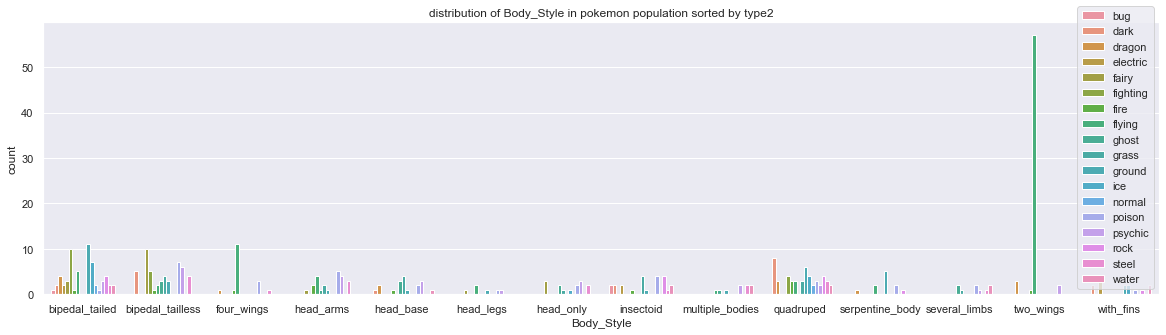

In [17]:
plt.figure( figsize=(20, 5))
create_barplot(data, 'Body_Style', 'type1')

plt.figure( figsize=(20, 5))
create_barplot(data, 'Body_Style', 'type2')

Text(0, 0.5, 'count')

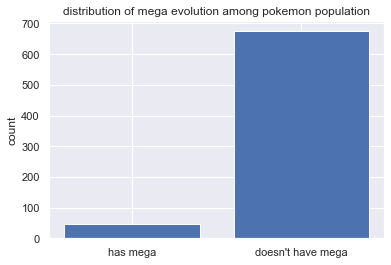

In [18]:
data_mega_f = data[data.hasMegaEvolution == False]
data_mega_t = data[data.hasMegaEvolution == True]

mega_t_f, mega_count = true_false_count(mega)
plt.bar(["has mega", "doesn't have mega"], mega_count)
plt.title("distribution of mega evolution among pokemon population")
plt.ylabel("count")


Text(0, 0.5, 'count')

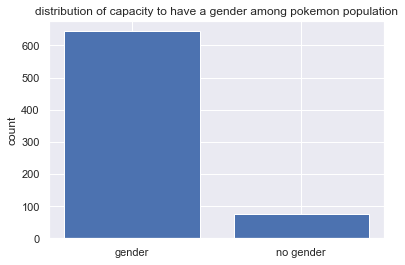

In [19]:
data_gender_f = data[data.hasGender==False]
data_gender_t = data[data.hasGender==True]

gender_t_f, gender_count = true_false_count(gender)
plt.bar(["gender", "no gender"], gender_count)

plt.title("distribution of capacity to have a gender among pokemon population")
plt.ylabel("count")


Text(0, 0.5, 'count')

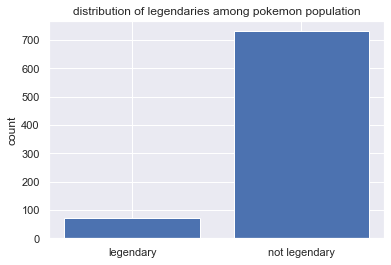

In [20]:
legend_f = data[data.is_legendary == False]
legend_t = data[data.is_legendary == True]

legend_t_f, legend_count = true_false_count(legendary)
plt.bar(["legendary", "not legendary"], legend_count)
plt.title("distribution of legendaries among pokemon population")
plt.ylabel("count")


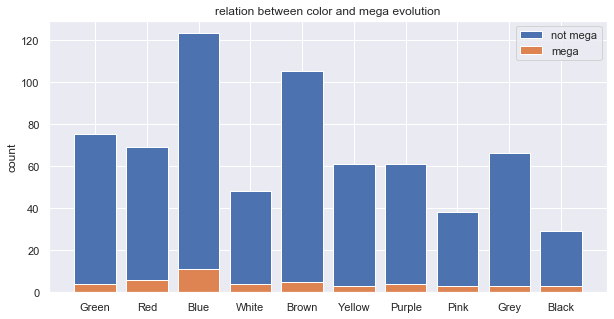

In [21]:
#relation between color and mega evolution

color_mega_f = data_mega_f['Color']
color_mega_t = data_mega_t['Color']

colf, couf = count(color_mega_f)
colt, cout = count(color_mega_t)


plt.figure( figsize=(10, 5))
a=plt.bar(colf, couf, label="not mega")
b=plt.bar(colt, cout, label="mega")
plt.title("relation between color and mega evolution")
plt.ylabel("count")
plt.legend(handles=[a, b])

<BarContainer object of 10 artists>

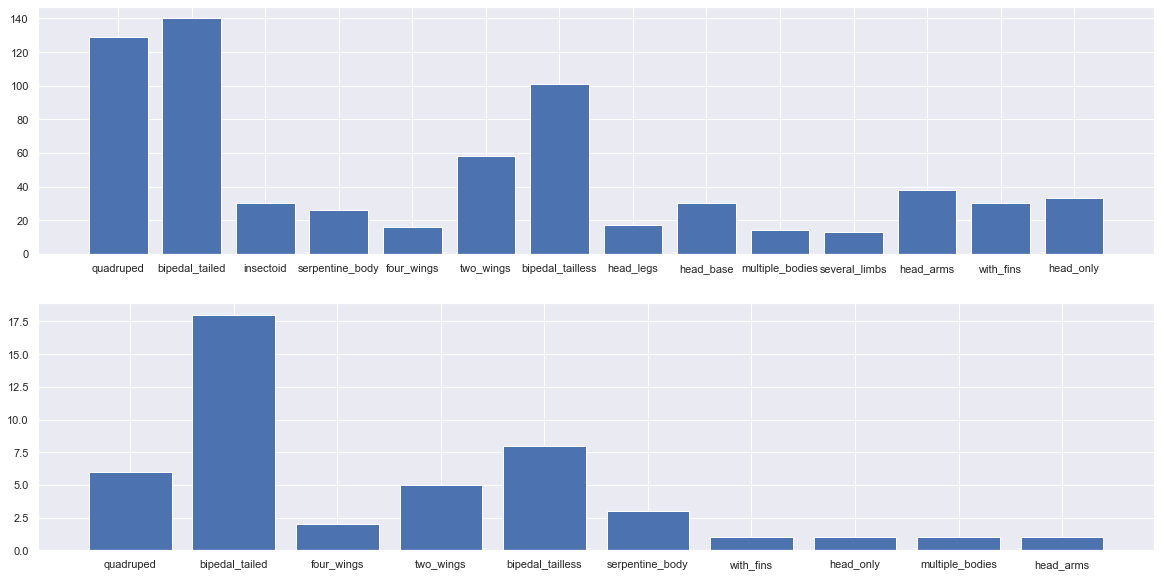

In [22]:
#relation between body type and mega evolution

body_mega_f = data_mega_f['Body_Style']
body_mega_t = data_mega_t['Body_Style']

colf, couf = count(body_mega_f)
colt, cout = count(body_mega_t)

fig, axs = plt.subplots(2, figsize=(20, 10))
axs[0].bar(colf, couf)
axs[1].bar(colt, cout)


Text(0, 0.5, 'rate')

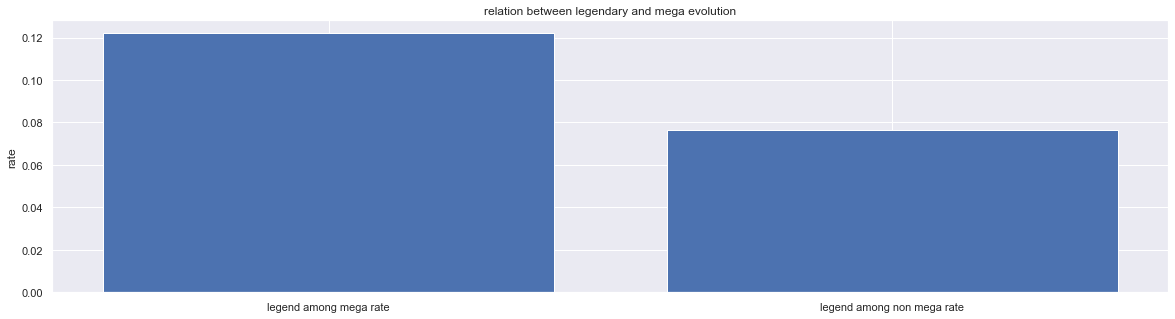

In [23]:
#relation between being legendary and having mega evolution

mega_and_legend = data_mega_t[data_mega_t.is_legendary == True]
mega_not_legend = data_mega_t[data_mega_t.is_legendary == False]
not_mega_but_legend = data_mega_f[data_mega_f.is_legendary == True]
not_mega_not_legend = data_mega_f[data_mega_f.is_legendary == False]
a=mega_and_legend.shape[0]
b=mega_not_legend.shape[0]
c=not_mega_but_legend.shape[0]
d=not_mega_not_legend.shape[0]
e=[a/b, c/d]
f=["legend among mega rate", "legend among non mega rate"]
plt.figure( figsize=(20, 5))
plt.bar(f, e)
plt.title("relation between legendary and mega evolution")
plt.ylabel("rate")


Text(0.5, 0, 'egg types')

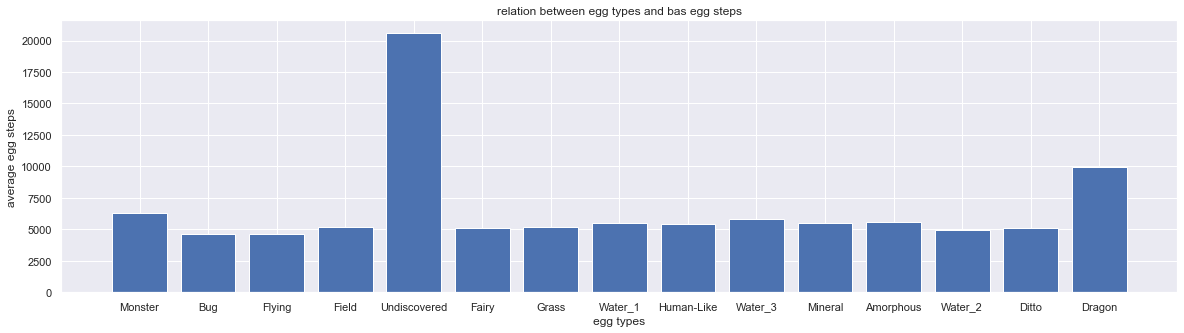

In [24]:
#relation between egg type and base egg steps
def count_steps(egg_types, egg_count, egg_types2, egg_count2):
    averages=np.zeros(len(egg_types1))
    n=0
    tot_egg_count=egg_count1
    for i in egg_types1:
        for j in range(len(data)):
            if egg1[j] == i:
                averages[n]+=egg_step[j]
            if egg2[j] == j:
                averages[n]+=egg_step[j]
                tot_egg_count[n]+=1
        n+=1
    averages= averages/tot_egg_count
    
    return averages

egg_types1, egg_count1 = count(egg1)
egg_types2, egg_count2 = count(egg2)

avg_steps_for_egg_types = count_steps(egg_types1, egg_count1, egg_types2, egg_count2)
plt.figure( figsize=(20, 5))
plt.bar(egg_types1, avg_steps_for_egg_types)
plt.title("relation between egg types and bas egg steps")
plt.ylabel("average egg steps")
plt.xlabel("egg types")

[52, 1]

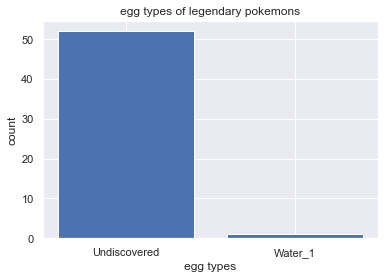

In [25]:
undiscovered = data[data.Egg_Group_1=="Undiscovered"]
legendary_undiscovered = undiscovered[undiscovered.is_legendary==True]

dragon1 = data[data.Egg_Group_1=="Dragon"]
dragon2 = data[data.Egg_Group_2=="Dragon"]
dragon1.append(dragon2)
legendary_dragons = dragon1[dragon1.is_legendary==True]


legendary_eggs, legendary_eggs_count = count(data[data.is_legendary==True]['Egg_Group_1'])

plt.bar(legendary_eggs, legendary_eggs_count)
plt.title("egg types of legendary pokemons")
plt.ylabel("count")
plt.xlabel("egg types")
legendary_eggs_count
#among legendaries 53 lay eggs and 52 of them are of the undiscovered type meaning that they can't breed... 
#but their eggs can still be found around

In [26]:

water1 = data[data.Egg_Group_1=="Water_1"]
water1_legendary = water1[water1.is_legendary==True]
water1_legendary
#only one legendary pokemon can breed, its egg's type are water1 and fairy

,pokedex_number,name,type1,type2,hp,defense,attack,sp_defense,sp_attack,speed,...,against_rock,against_steel,against_water,abilities,ability 1,ability 2,ability 3,ability 4,ability 5,ability 6
489,490,Manaphy,water,NaN,100,100,100,100,100,100,...,1.0,0.5,0.5,['Hydration'],Hydration,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'egg steps')

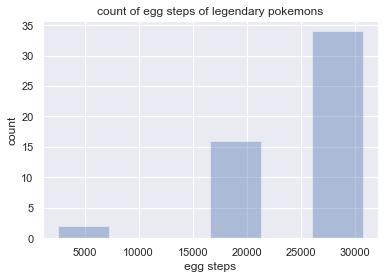

In [27]:
sns.distplot(undiscovered[undiscovered.is_legendary==True]['base_egg_steps'], kde=False)
plt.title("count of egg steps of legendary pokemons")
plt.ylabel("count")
plt.xlabel("egg steps")

Text(0.5, 0, 'egg steps')

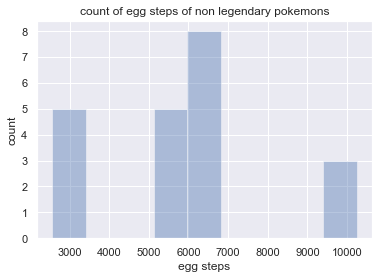

In [28]:
sns.distplot(undiscovered[undiscovered.is_legendary==False]['base_egg_steps'], kde=False)
plt.title("count of egg steps of non legendary pokemons")
plt.ylabel("count")
plt.xlabel("egg steps")

In [29]:
import random


def make_scatter_plot(feature_x, feature_y, feature_z, gen=0):   
    full_data = pd.read_csv("data/full_data_pkm.csv", sep=';')
    if gen==0:
        data=full_data
    else:
        data=full_data[full_data.generation==gen]
            
    z_array, z_count = count(data[feature_z])
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(z_array))]
    grp = []
    data_x=data[feature_x]
    data_y=data[feature_y]
    data_z=data[feature_z]
    N = data.shape[0]
    for i in z_array:
        g=(data_x[data_z==i], data_y[data_z==i])
        grp.append(g)

    groups = z_array

    # Create plot
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

    for data, color, group in zip(grp, colors, groups):
        x, y = data
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    if gen==0:
        plt.title(feature_x +" vs "+ feature_y+" colored by " + feature_z)
    else:
        plt.title(feature_x +" vs "+ feature_y+" colored by " + feature_z+" for generation "+ str(gen))
    plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5))
    plt.ylabel(feature_y)
    plt.xlabel(feature_x)
    plt.show()

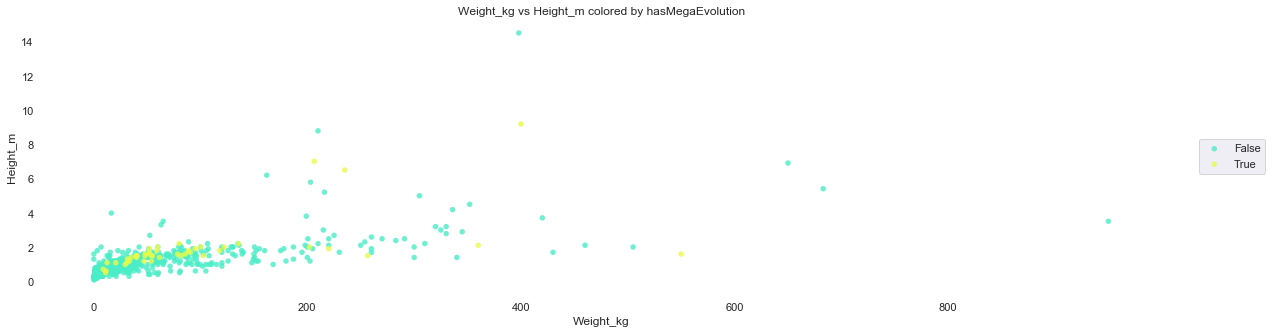

In [30]:
make_scatter_plot('Weight_kg', 'Height_m', 'hasMegaEvolution')

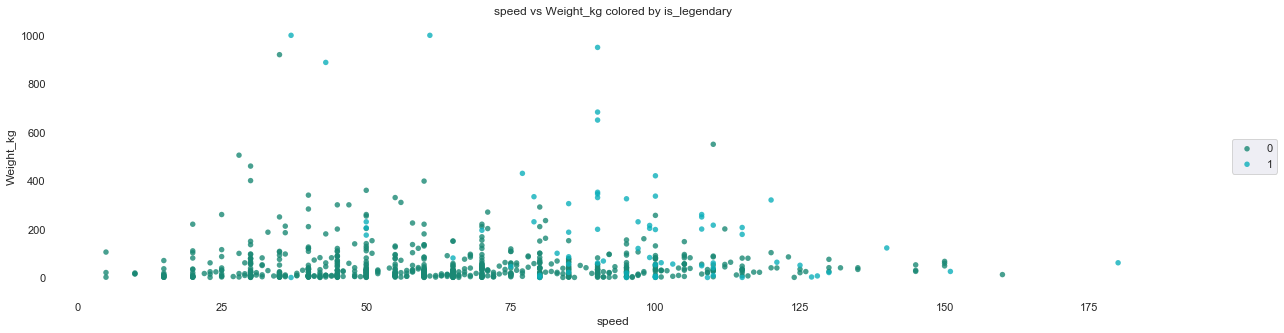

In [31]:
make_scatter_plot('speed', 'Weight_kg', 'is_legendary')

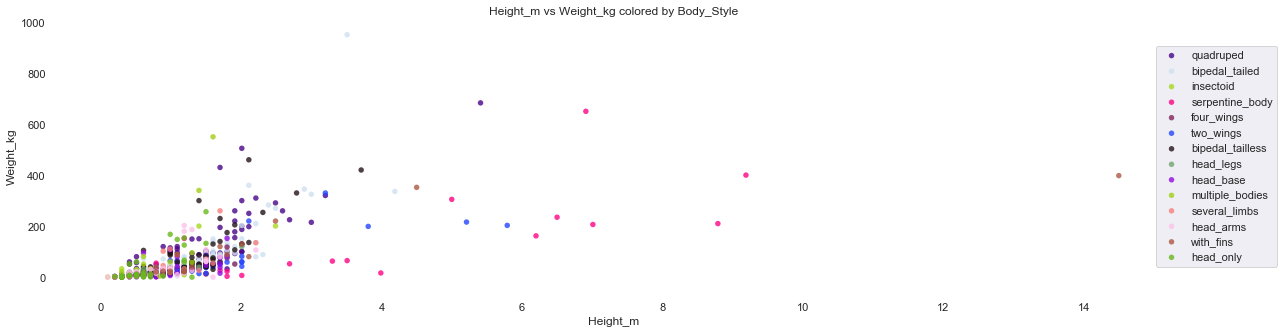

In [32]:
make_scatter_plot('Height_m', 'Weight_kg', 'Body_Style')

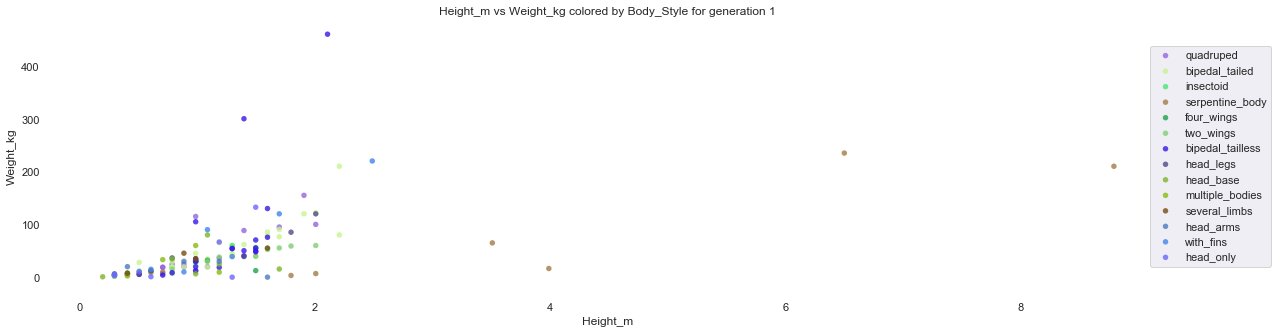

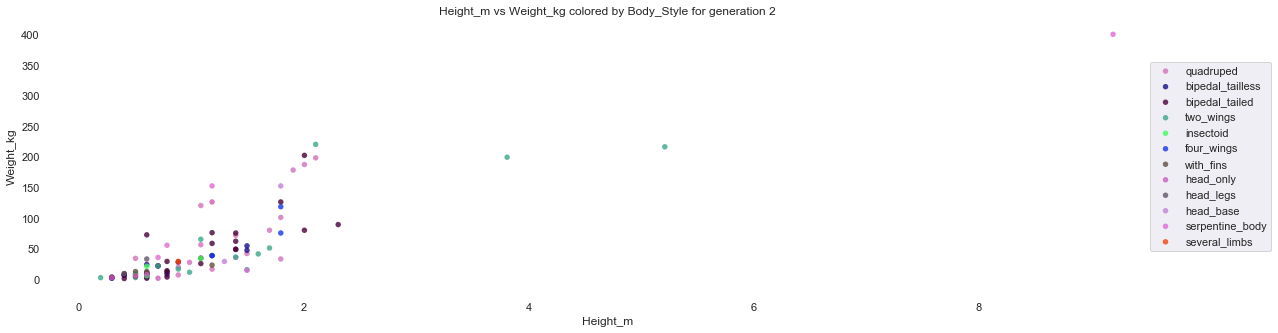

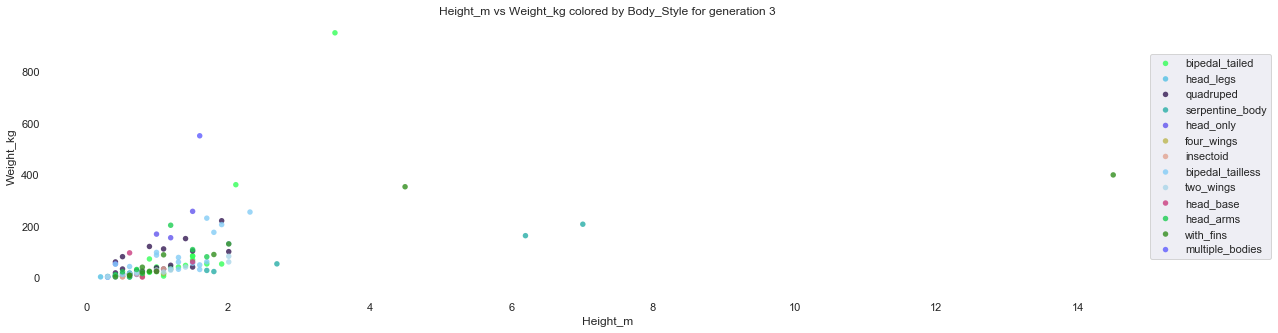

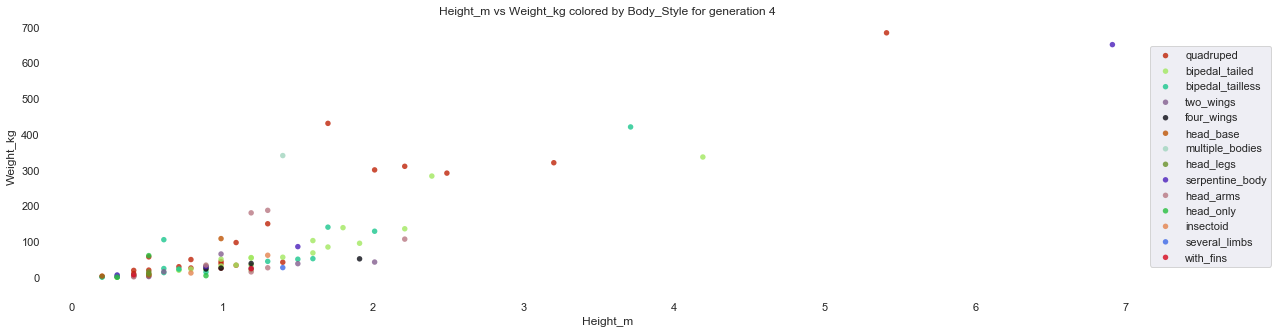

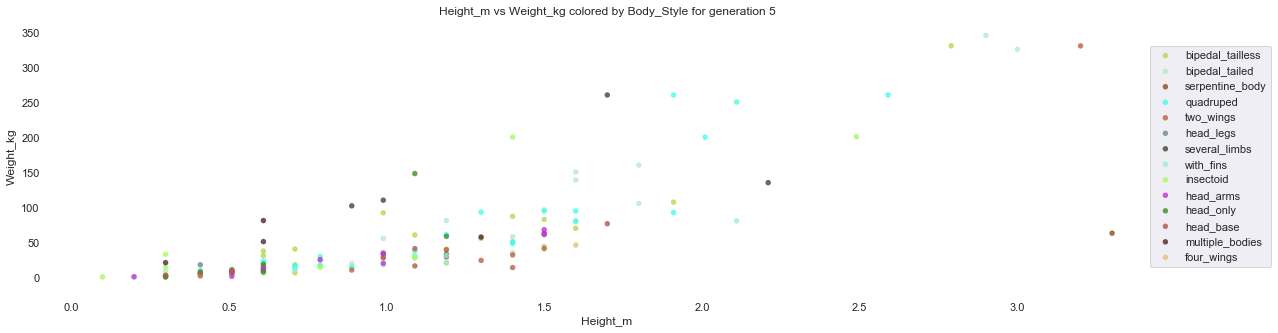

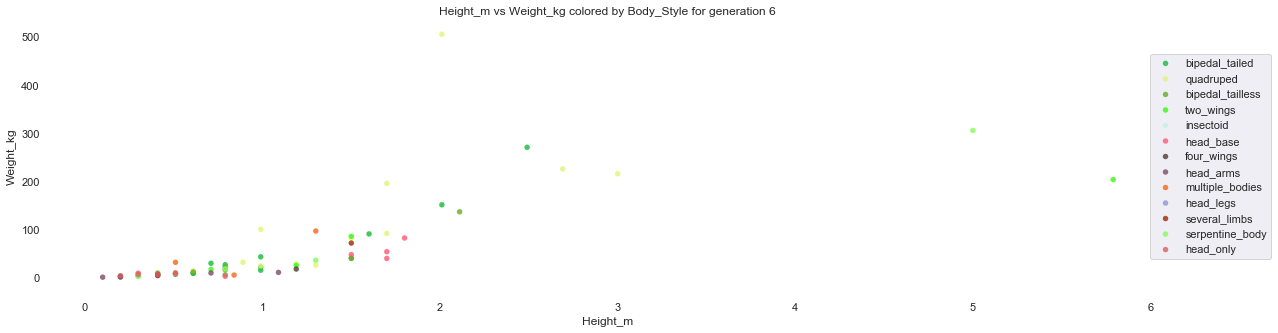

No handles with labels found to put in legend.


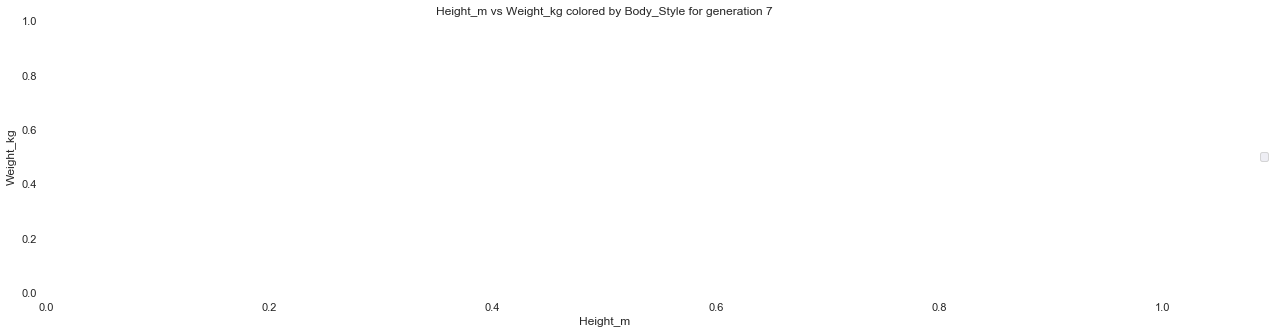

In [33]:
generations = data['generation']
gens, gen_count = count(generations)
gen1=data[data.generation==1]
gen2=data[data.generation==2]
gen3=data[data.generation==3]
gen4=data[data.generation==4]
gen5=data[data.generation==5]
gen6=data[data.generation==6]
gen7=data[data.generation==7]
make_scatter_plot('Height_m', 'Weight_kg', 'Body_Style', 1 )
make_scatter_plot('Height_m', 'Weight_kg', 'Body_Style', 2 )
make_scatter_plot('Height_m', 'Weight_kg', 'Body_Style', 3 )
make_scatter_plot('Height_m', 'Weight_kg', 'Body_Style', 4 )
make_scatter_plot('Height_m', 'Weight_kg', 'Body_Style', 5 )
make_scatter_plot('Height_m', 'Weight_kg', 'Body_Style', 6 )
make_scatter_plot('Height_m', 'Weight_kg', 'Body_Style', 7 )
    

## Combat data

In [34]:
data_fight = pd.read_csv("data/combats.csv", sep=',')

In [120]:
data_fight_array = np.asarray(data_fight)
results = data_fight_array[: , 2]
fighter1 = data_fight_array[: , 0]
fighter2 = data_fight_array[: , 1]
results=np.reshape(results, (50000))
fighter1=np.reshape(fighter1, (50000))
fighter2=np.reshape(fighter2, (50000))
sorted_res = results
sorted_res.sort()
sorted_res

array([  1,   1,   1, ..., 800, 800, 800], dtype=int64)

In [121]:
nbr_fight= np.zeros((800))
nbr_wins= np.zeros((800))
for i in range(800):    
    nbr_fight[i]= len(data_fight[data_fight.First_pokemon==i])+len(data_fight[data_fight.Second_pokemon==i])
    nbr_wins[i]= len(data_fight[data_fight.Winner==i])

Text(0.5, 0, 'win rate')

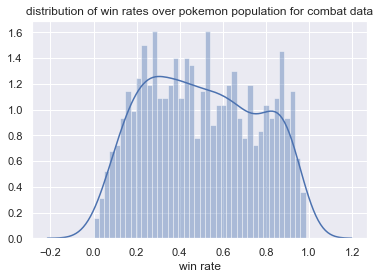

In [122]:
win_rate=nbr_wins/nbr_fight
win_rate
index=np.arange(800)+1
index
sns.distplot(win_rate, bins=40);
plt.title("distribution of win rates over pokemon population for combat data")
plt.xlabel("win rate")

In [133]:
ind  = (-win_rate).argsort()[:800].astype('int32')
top_ten_percent_id= ind[:80]
bottom_ten_percent_id= ind[702:782]
top_ten_percent=data.iloc[top_ten_percent_id]
bottom_ten_percent = data.iloc[bottom_ten_percent_id]
stats=data[["hp", "defense", "attack", "sp_defense", "sp_attack", "speed", "base_total"]]
bottom_ten_percent

,pokedex_number,name,type1,type2,hp,defense,attack,sp_defense,sp_attack,speed,...,against_rock,against_steel,against_water,abilities,ability 1,ability 2,ability 3,ability 4,ability 5,ability 6
194,195,Quagsire,water,ground,95,85,85,65,65,35,...,0.5,0.5,1.0,"['Damp', 'Water Absorb', 'Unaware']",Damp,Water Absorb,Unaware,NaN,NaN,NaN
644,645,Landorus,ground,flying,89,90,145,80,105,91,...,1.0,1.0,2.0,"['Sand Force', 'Sheer Force', 'Intimidate']",Sand Force,Sheer Force,Intimidate,NaN,NaN,NaN
281,282,Gardevoir,psychic,fairy,68,65,85,135,165,100,...,1.0,2.0,1.0,"['Synchronize', 'Trace', 'Telepathy']",Synchronize,Trace,Telepathy,NaN,NaN,NaN
10,11,Metapod,bug,NaN,50,55,20,25,25,30,...,2.0,1.0,1.0,['Shed Skin'],Shed Skin,NaN,NaN,NaN,NaN,NaN
208,209,Snubbull,fairy,NaN,60,50,80,40,40,30,...,1.0,2.0,1.0,"['Intimidate', 'Run Away', 'Rattled']",Intimidate,Run Away,Rattled,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,578,Duosion,psychic,NaN,65,50,40,60,125,30,...,1.0,1.0,1.0,"['Overcoat', 'Magic Guard', 'Regenerator']",Overcoat,Magic Guard,Regenerator,NaN,NaN,NaN
237,238,Smoochum,ice,psychic,45,15,30,65,85,65,...,2.0,2.0,1.0,"['Oblivious', 'Forewarn', 'Hydration']",Oblivious,Forewarn,Hydration,NaN,NaN,NaN
639,640,Virizion,grass,fighting,91,72,90,129,90,108,...,0.5,1.0,0.5,['Justified'],Justified,NaN,NaN,NaN,NaN,NaN
190,191,Sunkern,grass,NaN,30,30,30,30,30,30,...,1.0,1.0,0.5,"['Chlorophyll', 'Solar Power', 'Early Bird']",Chlorophyll,Solar Power,Early Bird,NaN,NaN,NaN


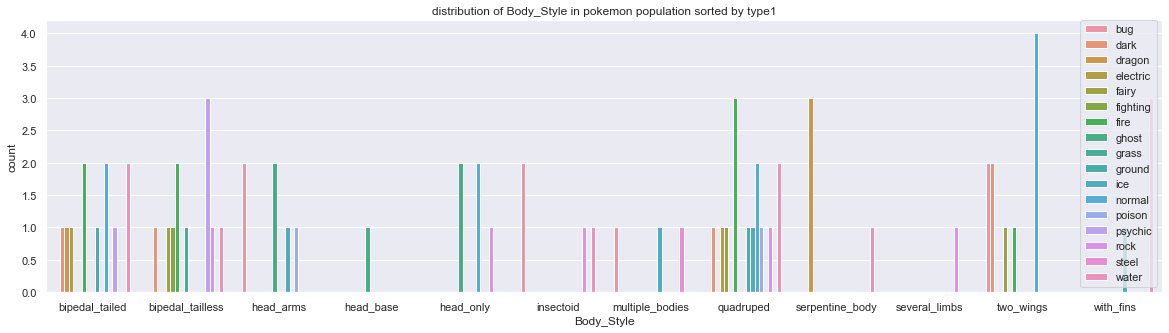

In [134]:

plt.figure( figsize=(20, 5))
create_barplot(top_ten_percent, 'Body_Style', 'type1')


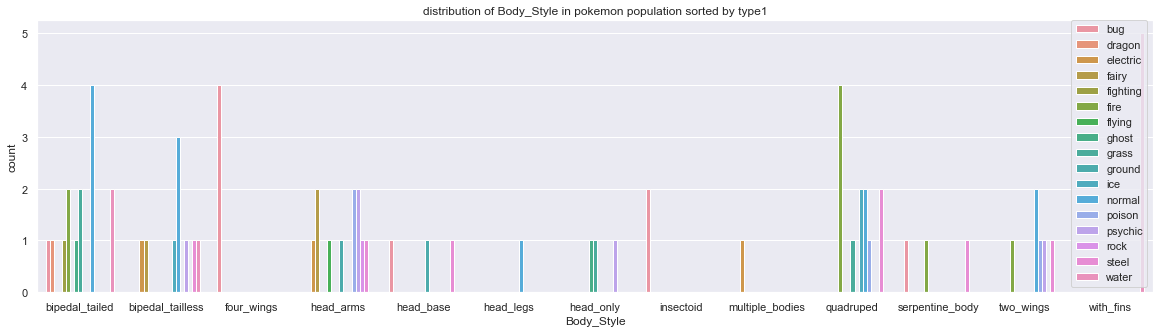

In [135]:
plt.figure( figsize=(20, 5))
create_barplot(bottom_ten_percent, 'Body_Style', 'type1')

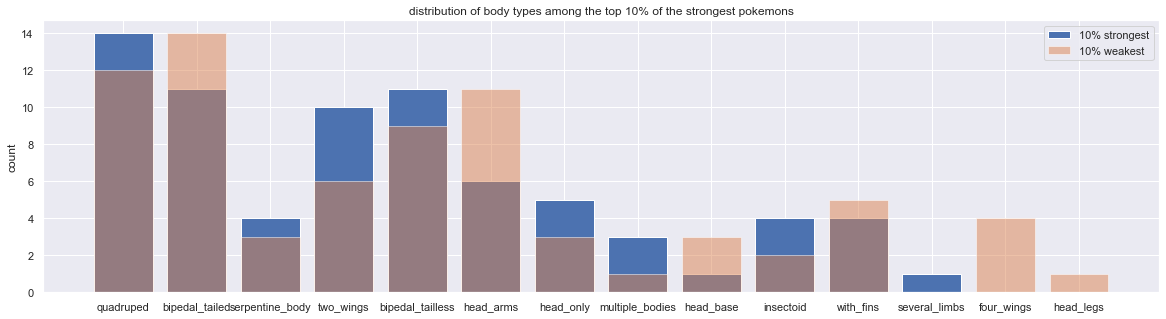

In [136]:
plt.figure( figsize=(20, 5))
a, b = count(top_ten_percent['Body_Style'])
c, d = count(bottom_ten_percent['Body_Style'])
plt.bar(a, b, label="10% strongest")
plt.bar(c, d, alpha=0.5, label="10% weakest")
plt.title("distribution of body types among the top 10% of the strongest pokemons")
plt.ylabel("count")
plt.legend()

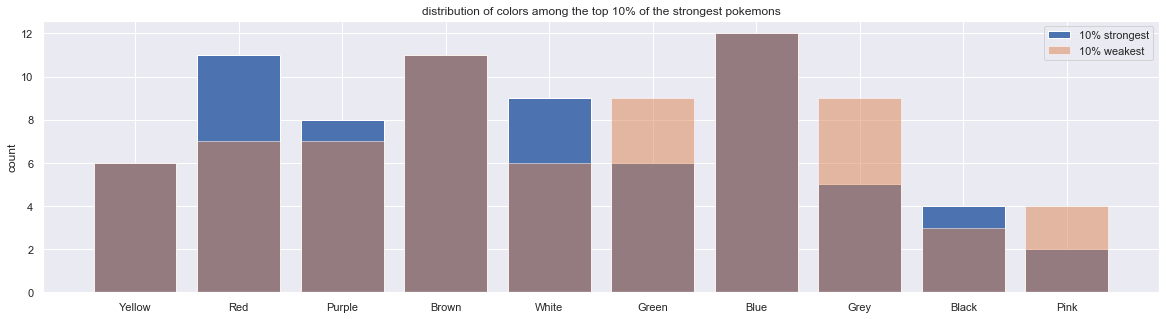

In [137]:
plt.figure( figsize=(20, 5))
a, b = count(top_ten_percent['Color'])
c, d = count(bottom_ten_percent['Color'])
plt.bar(a, b, label="10% strongest")
plt.bar(c, d, alpha=0.5, label="10% weakest")
plt.title("distribution of colors among the top 10% of the strongest pokemons")
plt.ylabel("count")
plt.legend()

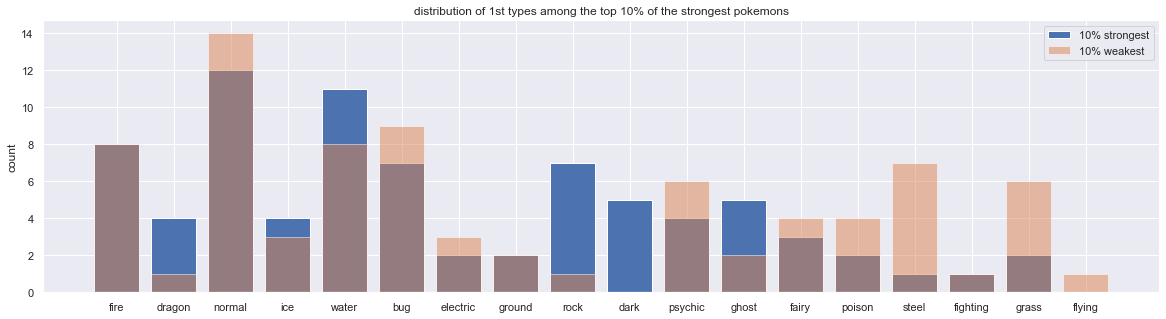

In [138]:
plt.figure( figsize=(20, 5))
a, b = count(top_ten_percent['type1'])
c, d = count(bottom_ten_percent['type1'])
plt.bar(a, b, label="10% strongest")
plt.bar(c, d, alpha=0.5, label="10% weakest")
plt.title("distribution of 1st types among the top 10% of the strongest pokemons")
plt.ylabel("count")
plt.legend()

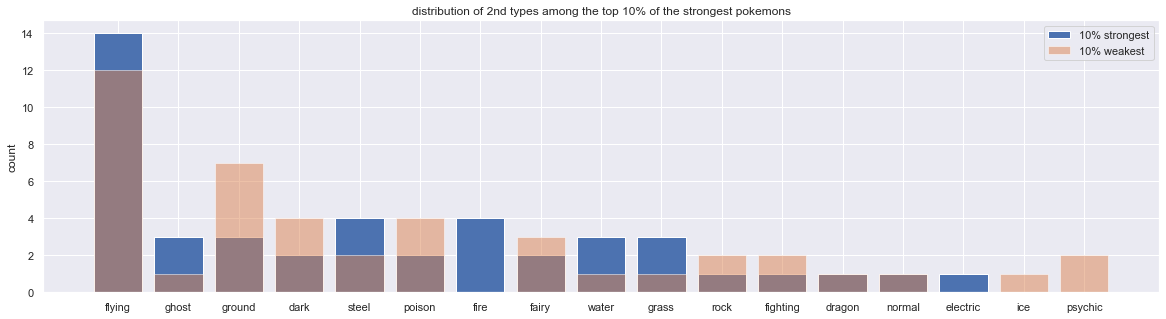

In [139]:
plt.figure( figsize=(20, 5))
a, b = count(top_ten_percent['type2'])
c, d = count(bottom_ten_percent['type2'])
plt.bar(a, b, label="10% strongest")
plt.bar(c, d, alpha=0.5, label="10% weakest")
plt.title("distribution of 2nd types among the top 10% of the strongest pokemons")
plt.ylabel("count")
plt.legend()

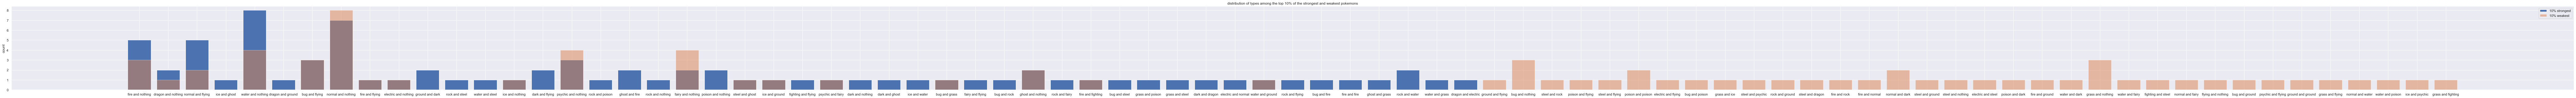

In [168]:
top_type_2 = top_ten_percent['type2']
top_type_2[pd.isnull(top_type_2)] ="nothing"
top_type_1_and_2=np.asarray([top_ten_percent['type1']+" and " + top_type_2])
top_type_1_and_2=np.reshape(top_type_1_and_2, (80))


bottom_type_2 = bottom_ten_percent['type2']
bottom_type_2[pd.isnull(bottom_type_2)] ="nothing"
bottom_type_1_and_2=np.asarray([bottom_ten_percent['type1']+" and " + bottom_type_2])
bottom_type_1_and_2=np.reshape(bottom_type_1_and_2, (80))

a, b = count(top_type_1_and_2)
c, d = count(bottom_type_1_and_2)

plt.figure( figsize=(150, 5))
plt.bar(a, b, label="10% strongest")
plt.bar(c, d, alpha=0.5, label="10% weakest")
plt.title("distribution of types among the top 10% of the strongest and weakest pokemons")
plt.ylabel("count")
plt.legend()


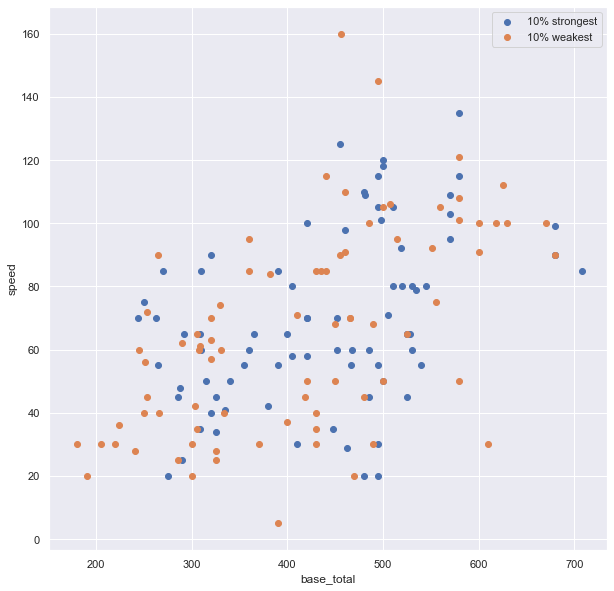

In [51]:
x='base_total'
y='speed'
plt.figure( figsize=(10, 10))
plt.scatter(top_ten_percent[x], top_ten_percent[y], label="10% strongest")
plt.scatter(bottom_ten_percent[x], bottom_ten_percent[y], label="10% weakest")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

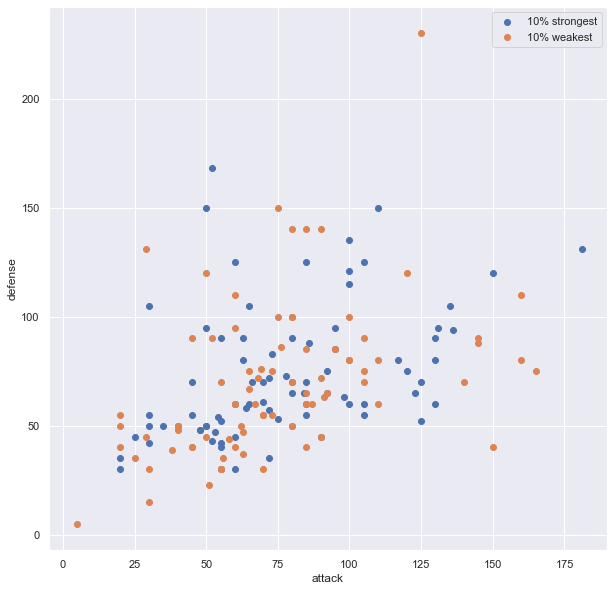

In [52]:
x='attack'
y='defense'
plt.figure( figsize=(10, 10))
plt.scatter(top_ten_percent[x], top_ten_percent[y], label="10% strongest")
plt.scatter(bottom_ten_percent[x], bottom_ten_percent[y], label="10% weakest")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

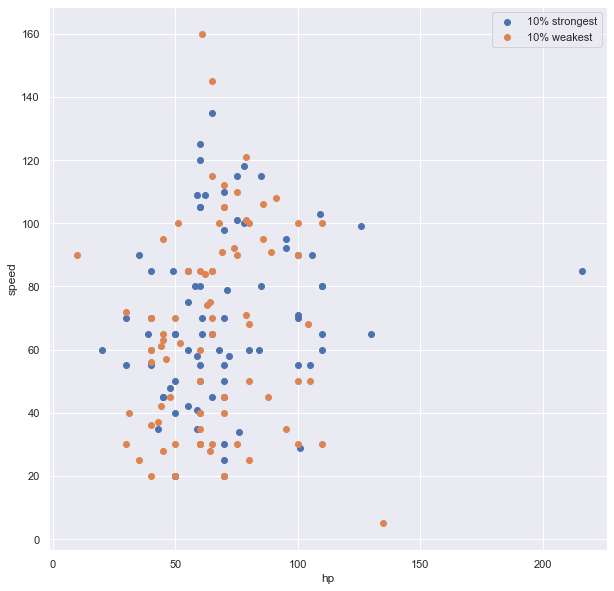

In [53]:
x='hp'
y='speed'
plt.figure( figsize=(10, 10))
plt.scatter(top_ten_percent[x], top_ten_percent[y], label="10% strongest")
plt.scatter(bottom_ten_percent[x], bottom_ten_percent[y], label="10% weakest")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

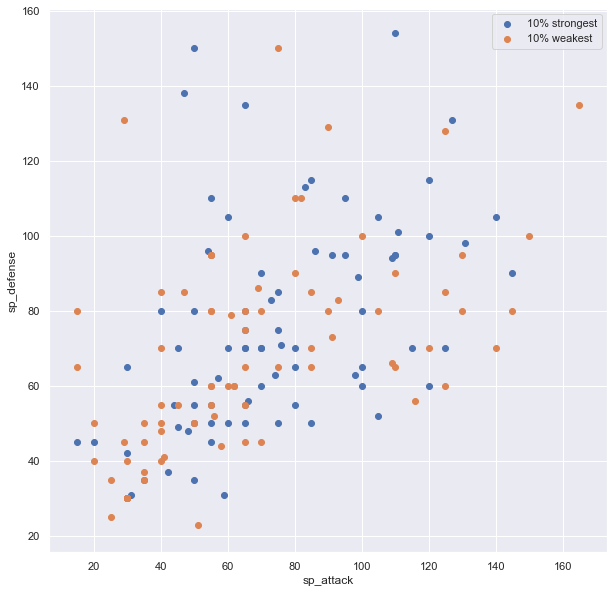

In [54]:
x='sp_attack'
y='sp_defense'
plt.figure( figsize=(10, 10))
plt.scatter(top_ten_percent[x], top_ten_percent[y], label="10% strongest")
plt.scatter(bottom_ten_percent[x], bottom_ten_percent[y], label="10% weakest")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

In [55]:
def count_abilities(data_):
    
    abilities=[]
    count=[]
    inti=0
    for i in range(1, 6):
        raw_abilities = data_['ability '+str(i)]
        for j in raw_abilities:
            new=True
            intk=0
            for k in abilities:
                if k==j:
                    new=False
                    count[intk]+=1
                    break
                intk+=1
            if new and not pd.isnull(j):
                abilities.append(j)
                count.append(1)
                
    return abilities, count

In [56]:
np.reshape(index[:10], (10))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Text(0.5, 0, 'abilities')

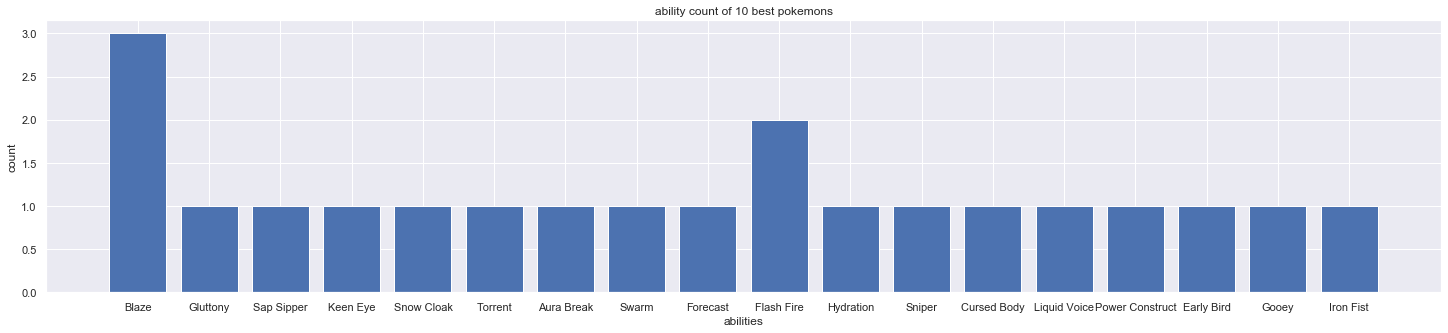

In [59]:
top_ten_pkm_id= ind[:10]
top_ten_pkm=data.iloc[top_ten_pkm_id]
top_abilities, top_abi_count = count_abilities(top_ten_pkm)


plt.figure( figsize=(25, 5))
plt.bar(top_abilities, top_abi_count)
plt.title("ability count of 10 best pokemons")
plt.ylabel("count")
plt.xlabel("abilities")

Text(0.5, 0, 'abilities')

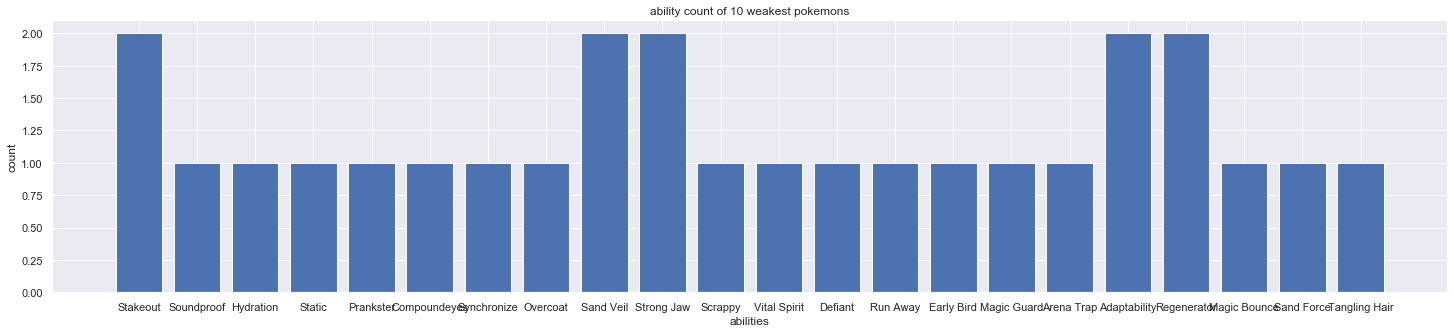

In [60]:
bottom_ten_pkm_id= ind[760:770]
bottom_ten_pkm=data.iloc[bottom_ten_pkm_id]
bottom_abilities, bottom_abi_count = count_abilities(bottom_ten_pkm)


plt.figure( figsize=(25, 5))
plt.bar(bottom_abilities, bottom_abi_count)
plt.title("ability count of 10 weakest pokemons")
plt.ylabel("count")
plt.xlabel("abilities")

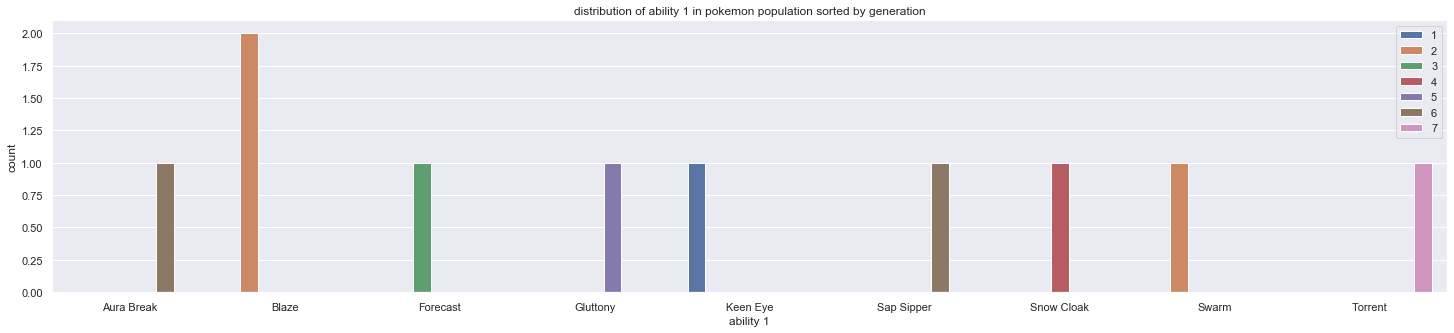

In [511]:
plt.figure( figsize=(25, 5))
create_barplot(top_ten_pkm, 'ability 1', 'generation')

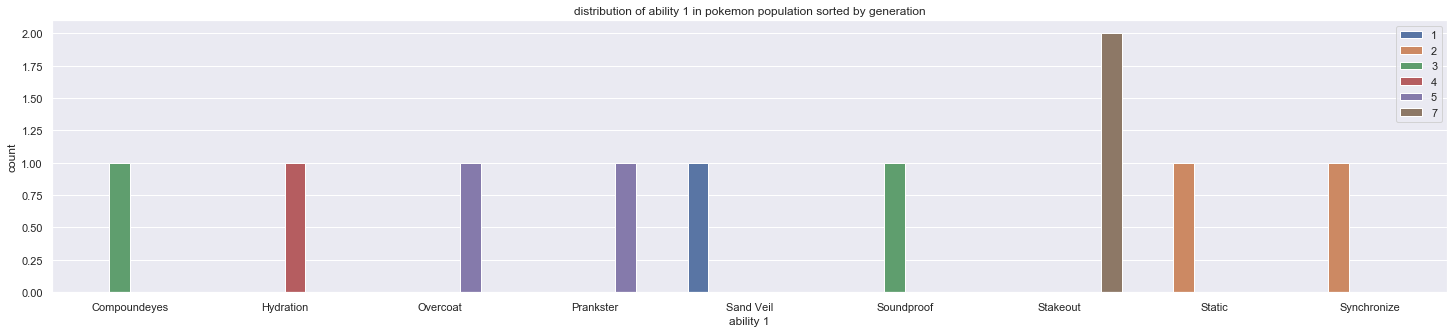

In [512]:
plt.figure( figsize=(25, 5))
create_barplot(bottom_ten_pkm, 'ability 1', 'generation')

Text(0.5, 0, 'abilities')

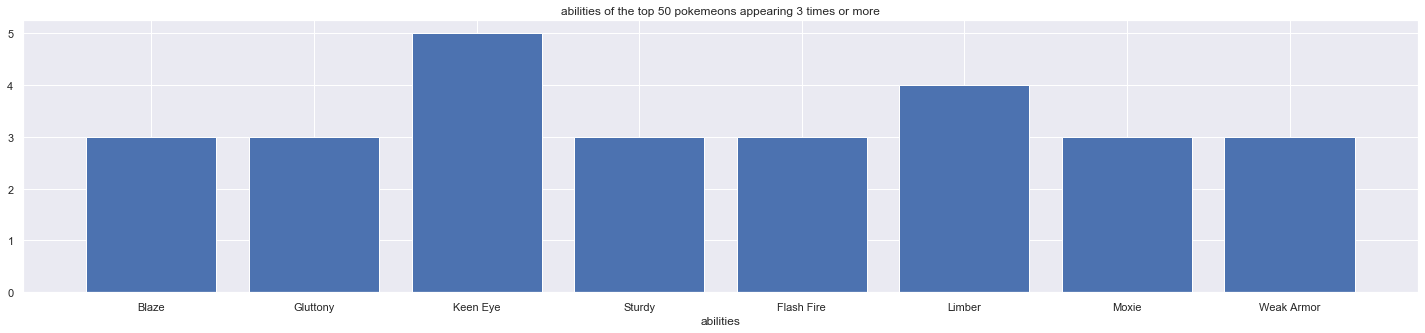

In [87]:
top_50_pkm_id= ind[:50]
top_50_pkm=data.iloc[top_50_pkm_id]
top_50_abilities, top_50_abi_count =count_abilities(top_50_pkm)
a=[count for (abi, count) in zip(top_50_abilities, top_50_abi_count) if count>=3]
b=[abi for (abi, count) in zip(top_50_abilities, top_50_abi_count) if count>=3]  
plt.figure( figsize=(25, 5))
plt.bar(b,a)
plt.title("abilities of the top 50 pokemeons appearing 3 times or more")
plt.xlabel("abilities")
plt.ylabel("count")

Text(0, 0.5, 'count')

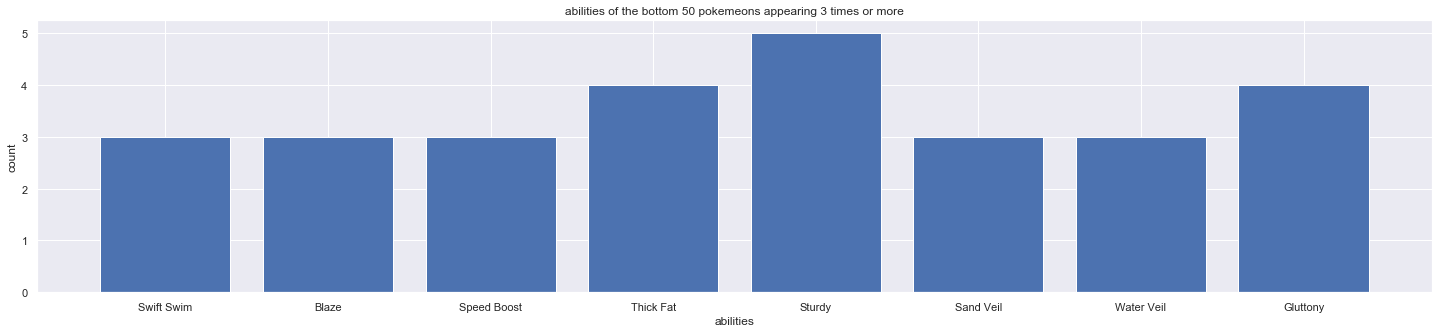

In [88]:
bottom_50_pkm_id= ind[720:770]
bottom_50_pkm=data.iloc[bottom_50_pkm_id]
bottom_50_abilities, bottom_50_abi_count =count_abilities(bottom_50_pkm)
a=[count for (abi, count) in zip(bottom_50_abilities, bottom_50_abi_count) if count>=3]
b=[abi for (abi, count) in zip(bottom_50_abilities, bottom_50_abi_count) if count>=3]  
plt.figure( figsize=(25, 5))
plt.bar(b,a)
plt.title("abilities of the bottom 50 pokemeons appearing 3 times or more")
plt.xlabel("abilities")
plt.ylabel("count")

## Popularity ranking

In [178]:
popularity = pd.read_csv("data/popularity_ranking.csv", sep=';')
popularity=popularity.rename(columns={'Pokemon': 'name'})
popularity[:10]

,name,Number of votes,Rank
0,Charizard,1107,1
1,Gengar,1056,2
2,Arcanine,923,3
3,Bulbasaur,710,4
4,Blaziken,613,5
5,Umbreon,607,6
6,Lucario,604,7
7,Gardevoir,585,8
8,Eevee,581,9
9,Dragonite,551,10


In [183]:
data_pop = data.set_index('name').join(popularity.set_index('name'))
data_pop[:10]

,pokedex_number,type1,type2,hp,defense,attack,sp_defense,sp_attack,speed,base_total,...,against_water,abilities,ability 1,ability 2,ability 3,ability 4,ability 5,ability 6,Number of votes,Rank
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,grass,poison,45,49,49,65,65,45,318,...,0.5,"['Overgrow', 'Chlorophyll']",Overgrow,Chlorophyll,NaN,NaN,NaN,NaN,710.0,4.0
Ivysaur,2,grass,poison,60,63,62,80,80,60,405,...,0.5,"['Overgrow', 'Chlorophyll']",Overgrow,Chlorophyll,NaN,NaN,NaN,NaN,83.0,152.0
Venusaur,3,grass,poison,80,123,100,120,122,80,625,...,0.5,"['Overgrow', 'Chlorophyll']",Overgrow,Chlorophyll,NaN,NaN,NaN,NaN,127.0,100.0
Charmander,4,fire,NaN,39,43,52,50,60,65,309,...,2.0,"['Blaze', 'Solar Power']",Blaze,Solar Power,NaN,NaN,NaN,NaN,374.0,32.0
Charmeleon,5,fire,NaN,58,58,64,65,80,80,405,...,2.0,"['Blaze', 'Solar Power']",Blaze,Solar Power,NaN,NaN,NaN,NaN,70.0,187.0
Charizard,6,fire,flying,78,78,104,115,159,100,634,...,2.0,"['Blaze', 'Solar Power']",Blaze,Solar Power,NaN,NaN,NaN,NaN,1107.0,1.0
Squirtle,7,water,NaN,44,65,48,64,50,43,314,...,0.5,"['Torrent', 'Rain Dish']",Torrent,Rain Dish,NaN,NaN,NaN,NaN,523.0,14.0
Wartortle,8,water,NaN,59,80,63,80,65,58,405,...,0.5,"['Torrent', 'Rain Dish']",Torrent,Rain Dish,NaN,NaN,NaN,NaN,133.0,96.0
Blastoise,9,water,NaN,79,120,103,115,135,78,630,...,0.5,"['Torrent', 'Rain Dish']",Torrent,Rain Dish,NaN,NaN,NaN,NaN,410.0,23.0


In [235]:
def pop_by(param, dataset):
    params, count_ = count(dataset[param])
    votes=np.zeros((len(params)))
    popu=np.asarray(dataset['Number of votes'])
    p=0
    for i in dataset[param]: 
        k=0
        for j in params:
            if i==j and popu[p]>=1:
                votes[k]+=popu[p]
                
            k+=1
        p+=1
    return params, votes

def pop_rate_by(param, dataset):
    params, count_ = count(dataset[param])
    votes=np.zeros((len(params)))
    popu=np.asarray(dataset['Number of votes'])
    p=0
    for i in dataset[param]: 
        k=0
        for j in params:
            if i==j and popu[p]>=1:
                votes[k]+=popu[p]
                
            k+=1
        p+=1
    return params, votes/count_

Text(0, 0.5, 'total votes')

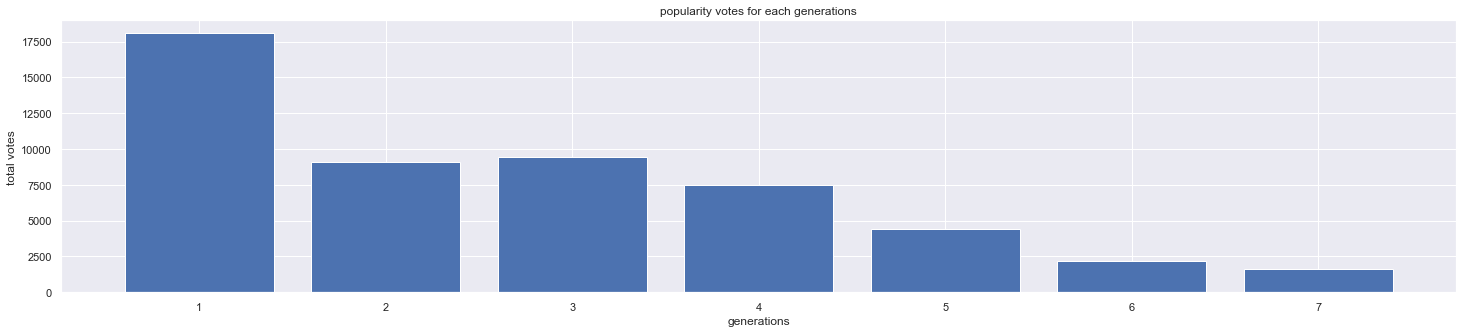

In [245]:
a, b = pop_by('generation', data_pop)
plt.figure( figsize=(25, 5))
plt.bar(a,b)
plt.title("popularity votes for each generations")
plt.xlabel("generations")
plt.ylabel("total votes")

Text(0, 0.5, 'total votes')

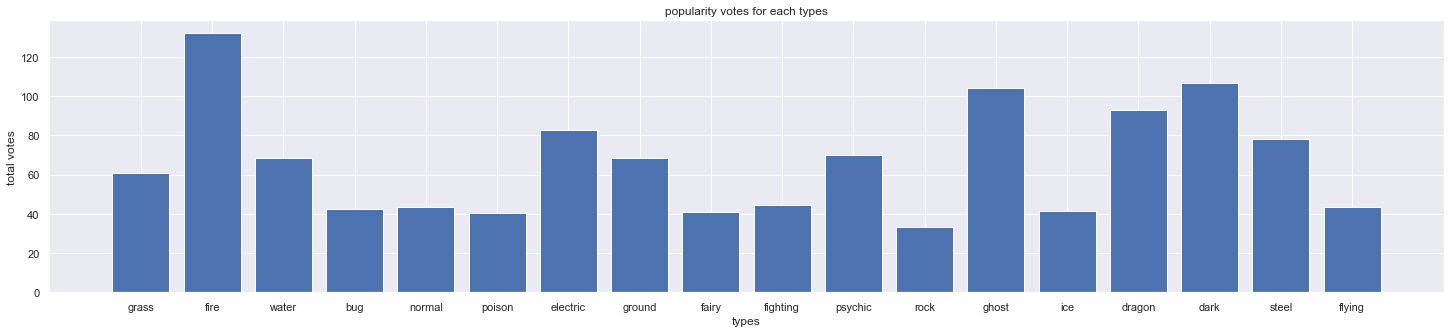

In [246]:
a, b = pop_rate_by('type1', data_pop)
plt.figure( figsize=(25, 5))
plt.bar(a,b)
plt.title("popularity rate votes for each types")
plt.xlabel("types")
plt.ylabel("total votes")

Text(0, 0.5, 'total votes')

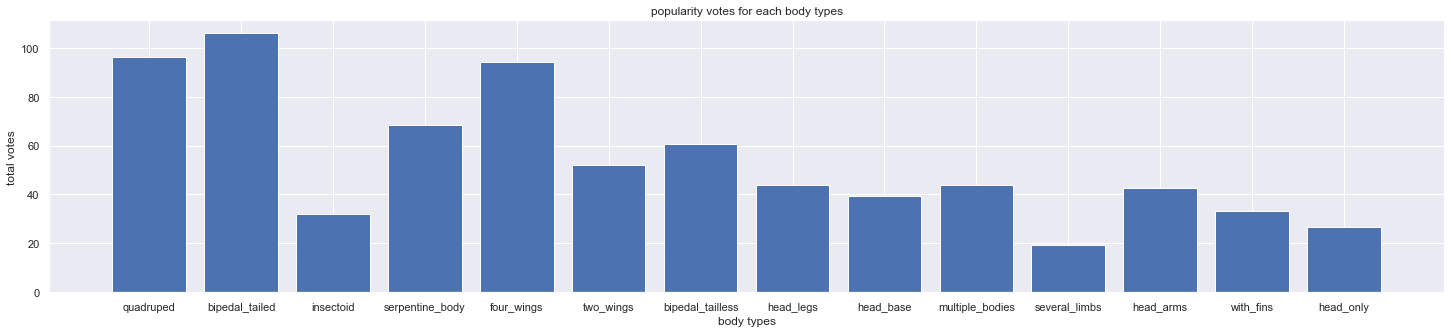

In [247]:
a, b = pop_rate_by('Body_Style', data_pop)
plt.figure( figsize=(25, 5))
plt.bar(a,b)
plt.title("popularity rate votes for each body types")
plt.xlabel("body types")
plt.ylabel("total votes")

Text(0, 0.5, 'total votes')

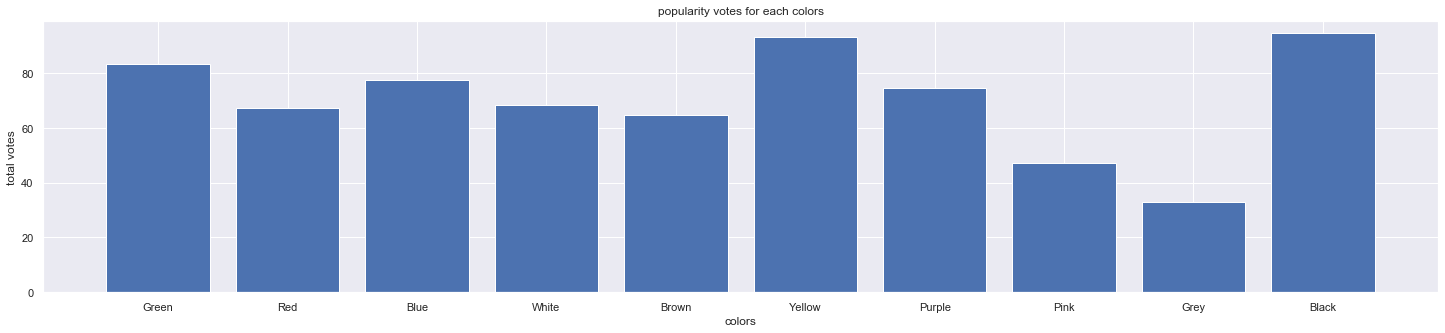

In [249]:
a, b = pop_rate_by('Color', data_pop)
plt.figure( figsize=(25, 5))
plt.bar(a,b)
plt.title("popularity votes for each colors")
plt.xlabel("colors")
plt.ylabel("total votes")

people seem to prefer pokemons from older generations and have a liking toward fire types pokemons

## Related Work

* What others have already done with the data?
* Why is your approach original?
* What source of inspiration do you take? Visualizations that you found on other websites or magazines (might be unrelated to your data).
* In case you are using a dataset that you have already explored in another context (ML or ADA course, semester project...), you are required to share the report of that work to outline the differences with the submission for this class.